# Gráficas y Coeficiente de Difusión

In [1]:
using LightGraphs
using GraphPlot
using Graphs
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [149]:
using GLM
using DataFrames

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/GLM/6OREG.ji for GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1184


In [2]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR WUH

num_vuelos_directos = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_MX_inf_num = string(airline_code, "_cantidad_MX.csv")
   
    wuh_mx = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_MX_inf_num", ',', Int64)
    
    push!(num_vuelos_directos, wuh_mx)
    
end

return num_vuelos_directos

29-element Array{Any,1}:
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 ⋮  
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

In [4]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

num_vuelos_infectados = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_inf_MX_num = string(airline_code, "_cantidad_inf_MX.csv")
   
    wuh_inf = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_inf_MX_num", ',', Int64)
    
    push!(num_vuelos_infectados, wuh_inf)
    
end

return num_vuelos_infectados

29-element Array{Any,1}:
 [894]
 [936]
 [893]
 [744]
 [0]  
 [0]  
 [577]
 [566]
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 ⋮    
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  

In [5]:
"""
    import_matrix(arch::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end


import_matrix

In [86]:
gl=import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/BX_matriz_du.csv")

15×15 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0

In [6]:
"""
    airport_names(arch::AbstractString)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function airport_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',', String)
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end


airport_names

In [151]:
an = airport_names("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/global_matriz_du.csv")

3072-element Array{String,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "KZI"
 "KOT"
 "PSJ"
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"

In [7]:
"""
    my_graph(M::Array{Int64,2}, airline_code::String)

Función que hace el grafo de la red aérea dirigida.
"""
function my_graph(M::Array{Int64,2}, airline_code::String)

    grafo = DiGraph(M)

end


my_graph

In [87]:
ggl = my_graph(gl, "global")

{15, 28} directed simple Int64 graph

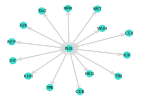

In [92]:
#nodelabel = collect(1:nv(ggl))
nodelabel = collect(an)
gplot(ggl, nodelabel=nodelabel)

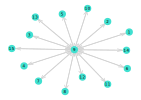

In [120]:
nodelabel = collect(1:nv(ggl))
#nodelabel = collect(an)
gplot(ggl, nodelabel=nodelabel)

In [8]:
"""

    busca_WUH(list_aerop::Array{String, 1})

La función busca_WUH tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto WUH.
Regresa el índice del aeropuerto WUH.
"""
function busca_WUH(list_aerop::Array{String, 1})

    i = 1
    while list_aerop[i] != "WUH"
        i +=1
    end
    i
end


busca_WUH

In [99]:
busca_WUH(an)

14

In [100]:
dis = dijkstra_shortest_paths(ggl, 14)

LightGraphs.DijkstraState{Int64,Int64}([9, 9, 9, 9, 9, 9, 9, 9, 14, 9, 9, 9, 9, 0, 9], [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2], Array{Int64,1}[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []], UInt64[0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001, 0x0000000000000001], Int64[])

In [122]:
dis.dists

15-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 1
 2
 2
 2
 2
 0
 2

In [9]:
"""

    busca_aeropuerto(list_aerop::Array{String, 1}, aeropuerto::String)

La función busca_aeropuerto tiene como parámetros:
list_aerop, lista de aeropuertos de la aerolínea
aeropuerto, nombre del aeropuerto que se quiere buscar
La función lee la lista de aeropuertos de la aerolínea, busca el índice del aeropuerto que se desea.
Regresa el índice de dicho aeropuerto.
"""
function busca_aeropuerto(list_aerop::Array{String, 1}, aeropuerto::String)

    i = 1
    while list_aerop[i] != aeropuerto
        i +=1
    end
    i
end


busca_aeropuerto

## Coeficiente de Difusión

$$<x^2> = \frac{1}{N} \sum_{i=1}^{N} |x^{(i)} (t) - x_0|^2$$

$$ D = \frac{<x^2>}{2t}$$


In [214]:
#correcta
N = 1000
Ls = []
coefs_dif = []
DMS = []

for k = 2 #:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i in 1:1001 
        #@show i
        
        
            
            
        for j in 1:size(rwn)[1] #num. de iteraciones/renglones
            #@show j
            
            
            u = findfirst(x -> x == 0, rwn[j,:])
            if u == nothing
                
                indice_aerop = rwn[j, i]
                
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                
                dist_media = spls.dists[indice_wuh[]]
                
                L = (dist_media)^2
                
            elseif u != nothing
                L = 0
                N -= 1
            end
            
            
          
            
            push!(Ls, L) #para un mismo tiempo
            
        end
        
        dms = (sum(Ls))/N
        push!(DMS, dms)
        
        
        D = dms/(2*i)
        push!(coefs_dif, D)
        
        Ls = []
        
    end
    
end
coefs_dif = convert(Array{Float64, 1}, coefs_dif)
DMS = convert(Array{Float64, 1}, DMS)
return DMS, coefs_dif

airline_code = "global"


([0.0, 2.03374, -120.182, -4.52874, -2.60292, -1.87671, -1.55188, -1.3579, -1.12937, -1.06498  …  -0.0147283, -0.0143687, -0.0145369, -0.014929, -0.0148154, -0.0147288, -0.014729, -0.0147499, -0.0148125, -0.0153031], [0.0, 0.508436, -20.0303, -0.566092, -0.260292, -0.156393, -0.110848, -0.0848688, -0.0627425, -0.0532489  …  -7.42354e-6, -7.23501e-6, -7.31232e-6, -7.50203e-6, -7.43744e-6, -7.38658e-6, -7.37923e-6, -7.38234e-6, -7.40625e-6, -7.64391e-6])

In [170]:
DMS

1001-element Array{Float64,1}:
    0.0                 
    2.0337423312883436  
 -120.18181818181819    
   -4.528735632183908   
   -2.602919708029197   
   -1.8767123287671232  
   -1.5518763796909492  
   -1.3579009433962264  
   -1.129365469749139   
   -1.0649789029535865  
   -0.9541928333949021  
   -0.9060446780551905  
   -0.821354628808045   
    ⋮                   
   -0.01483329825932718 
   -0.014584027846603417
   -0.014728296090055925
   -0.014368737655144301
   -0.01453688566312751 
   -0.014929033994885063
   -0.01481539031591026 
   -0.014728841842567965
   -0.01472895033489798 
   -0.014749912859028252
   -0.0148125           
   -0.015303103732268529

In [177]:
x = collect(0:1:1000)
y = DMS
df = hcat(x,y)
df = convert(DataFrame, df)

,x1,x2
,Float64,Float64
1,0.0,0.0
2,1.0,2.03374
3,2.0,-120.182
4,3.0,-4.52874
5,4.0,-2.60292
6,5.0,-1.87671
7,6.0,-1.55188
8,7.0,-1.3579
9,8.0,-1.12937


In [178]:
#Ajustamos una recta 
ajuste = lm(@formula(x2 ~ x1), df)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
──────────────────────────────────────────────────────────
                 Estimate    Std.Error   t value  Pr(>|t|)
──────────────────────────────────────────────────────────
(Intercept)  -0.674866     0.239679     -2.8157     0.0050
x1            0.000970579  0.000415033   2.33856    0.0196
──────────────────────────────────────────────────────────

In [179]:
coeficientes_df = round.(coef(ajuste), digits=5)

2-element Array{Float64,1}:
 -0.67487
  0.00097

In [180]:
r_2 = round.(r2(ajuste), digits=5)

0.00544

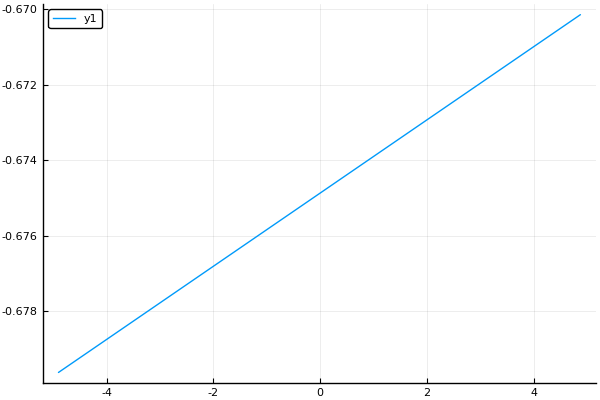

In [181]:
my_equation(x) = coeficientes_df[2]*(x) + coeficientes_df[1]
Plots.plot(my_equation)

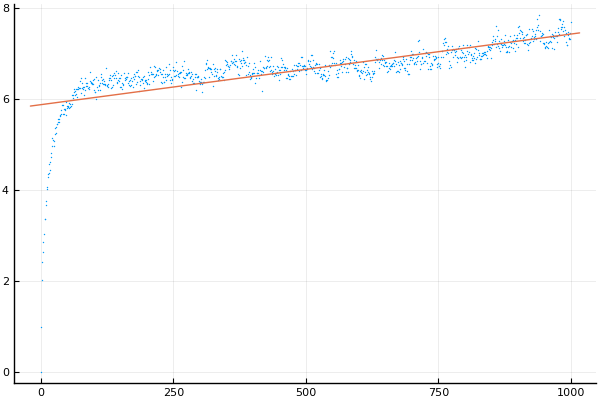

In [213]:
Plots.scatter(x,y, markersize=1, markerstrokewidth=0, legend=false)
Plots.plot!(my_equation)

In [202]:
DMS == DMS2

false

In [199]:
N = 1000
Ls = []
coefs_dif2 = []
DMS2 = []

for k = 2 #:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i in 1:1001 #tiempo
        #@show i
        
        col = rwn[:,i]
            @show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                
                indice_aerop = col[j]
                
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                
                dist_media = spls.dists[indice_wuh[]]
                
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            
          
            
            push!(Ls, L) #para un mismo tiempo
            
        end
        
        dms = (sum(Ls))/N
        push!(DMS2, dms)
        
        
        D = dms/(2*i)
        push!(coefs_dif2, D)
        
        Ls = []
        
    end
    
end
coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS2 = convert(Array{Float64, 1}, DMS2)
return DMS2, coefs_dif2

airline_code = "global"
col = [282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282,

col = [279, 276, 139, 247, 224, 1322, 763, 287, 279, 139, 286, 243, 228, 264, 443, 247, 1655, 139, 140, 279, 1607, 273, 222, 150, 264, 236, 232, 140, 220, 224, 282, 237, 1697, 282, 296, 221, 1599, 237, 247, 278, 143, 250, 576, 223, 219, 223, 250, 1597, 282, 239, 276, 1314, 286, 246, 251, 223, 900, 276, 274, 258, 251, 282, 287, 282, 764, 223, 221, 250, 1525, 220, 908, 268, 279, 1655, 292, 252, 1660, 264, 2316, 226, 220, 768, 272, 236, 139, 222, 139, 2316, 224, 264, 142, 289, 139, 286, 2392, 247, 264, 224, 260, 708, 222, 248, 219, 2172, 223, 271, 604, 152, 260, 286, 140, 232, 238, 252, 238, 2316, 143, 228, 1597, 708, 260, 232, 178, 1105, 516, 219, 238, 1669, 236, 146, 260, 140, 251, 282, 282, 1574, 2337, 282, 708, 276, 1528, 1579, 282, 2316, 264, 286, 1701, 139, 223, 287, 265, 226, 260, 1454, 272, 2027, 273, 236, 1432, 219, 235, 141, 224, 274, 287, 282, 232, 2097, 909, 1585, 403, 222, 140, 281, 246, 1413, 220, 261, 72, 223, 1609, 224, 2010, 253, 275, 267, 1596, 1332, 231, 708, 139, 278, 

col = [1546, 231, 235, 232, 673, 1335, 150, 247, 602, 1314, 235, 219, 276, 418, 222, 271, 289, 147, 2201, 279, 261, 764, 228, 2434, 708, 152, 248, 140, 264, 276, 273, 2098, 282, 250, 296, 151, 221, 280, 1515, 152, 15, 1668, 149, 1635, 2316, 230, 222, 764, 2159, 286, 279, 1216, 220, 140, 139, 261, 2160, 148, 264, 136, 287, 271, 2197, 274, 1607, 252, 254, 2316, 247, 239, 418, 223, 418, 259, 1594, 148, 282, 264, 279, 513, 267, 258, 223, 1607, 252, 271, 1655, 2316, 1594, 284, 139, 249, 272, 263, 1413, 272, 1579, 223, 1644, 281, 235, 223, 140, 403, 265, 274, 604, 292, 232, 224, 403, 288, 255, 1337, 605, 222, 291, 140, 260, 2308, 1548, 71, 1432, 828, 2312, 1432, 149, 705, 287, 1532, 1639, 220, 251, 273, 226, 1248, 2634, 1438, 2316, 276, 2316, 244, 1529, 1587, 1437, 286, 150, 279, 282, 220, 135, 708, 228, 1650, 265, 1958, 273, 252, 430, 228, 239, 276, 272, 1609, 274, 224, 259, 152, 1105, 250, 823, 278, 193, 296, 708, 298, 272, 605, 510, 286, 236, 152, 249, 1665, 273, 261, 259, 500, 500, 218, 

col = [1484, 232, 14, 260, 1314, 1335, 514, 247, 2160, 1314, 282, 581, 223, 105, 2337, 271, 604, 149, 2201, 224, 1657, 225, 219, 2605, 273, 1595, 1219, 421, 203, 2409, 265, 365, 219, 708, 278, 764, 271, 138, 148, 222, 15, 273, 222, 224, 265, 2414, 265, 292, 246, 2316, 915, 265, 220, 1891, 261, 1528, 1923, 148, 239, 366, 2032, 74, 2197, 2316, 218, 366, 264, 235, 219, 230, 421, 265, 366, 565, 280, 1698, 138, 748, 225, 1488, 251, 1574, 235, 246, 2172, 249, 264, 2316, 232, 1671, 219, 1609, 259, 22, 1413, 1607, 238, 282, 1644, 138, 235, 219, 146, 192, 736, 251, 219, 246, 149, 142, 979, 261, 278, 2633, 2307, 224, 764, 349, 260, 142, 279, 748, 4, 173, 2310, 9, 74, 286, 708, 235, 605, 219, 253, 1523, 136, 387, 238, 602, 253, 274, 224, 1648, 74, 14, 375, 220, 151, 14, 53, 222, 133, 278, 287, 1657, 265, 500, 287, 264, 1493, 232, 252, 514, 247, 151, 272, 138, 278, 500, 1096, 918, 825, 763, 43, 228, 264, 1026, 228, 900, 1639, 264, 248, 1433, 708, 1413, 178, 254, 278, 272, 500, 235, 287, 222, 1283,

col = [1484, 1595, 14, 2408, 1314, 136, 2008, 287, 1421, 143, 273, 565, 222, 364, 1706, 265, 232, 371, 238, 137, 497, 277, 272, 2593, 263, 138, 264, 182, 2676, 763, 221, 6, 272, 236, 140, 276, 296, 1961, 139, 249, 4, 222, 222, 271, 273, 139, 274, 1584, 1897, 2402, 366, 147, 2413, 1680, 143, 1605, 401, 14, 1609, 1804, 2034, 219, 2027, 238, 238, 1211, 272, 514, 1695, 271, 180, 800, 15, 149, 265, 512, 272, 140, 770, 1483, 239, 1574, 264, 230, 1578, 249, 265, 2316, 452, 252, 223, 767, 138, 237, 223, 235, 264, 264, 1471, 558, 279, 219, 498, 1394, 1900, 258, 140, 268, 238, 511, 55, 516, 223, 247, 2309, 267, 528, 1050, 767, 449, 1653, 299, 1747, 176, 2311, 136, 53, 228, 138, 276, 1021, 262, 1609, 1521, 74, 387, 3015, 4, 261, 223, 282, 293, 74, 1789, 385, 764, 224, 2639, 1552, 292, 1574, 260, 768, 500, 437, 500, 267, 224, 393, 767, 222, 1079, 292, 148, 223, 272, 1673, 1218, 1997, 375, 379, 272, 736, 286, 247, 2295, 766, 449, 250, 2316, 139, 1421, 272, 1413, 1025, 250, 1579, 224, 1331, 278, 243

col = [1218, 280, 917, 136, 916, 904, 225, 222, 390, 403, 505, 565, 1589, 300, 1336, 143, 452, 446, 238, 293, 497, 1579, 249, 2593, 19, 139, 232, 2173, 598, 276, 505, 2341, 276, 141, 1646, 153, 15, 387, 1607, 1596, 2207, 908, 264, 707, 273, 232, 271, 238, 232, 264, 274, 223, 276, 260, 908, 228, 1432, 1964, 281, 576, 2034, 219, 500, 238, 264, 1151, 243, 1487, 1697, 260, 404, 1085, 15, 1532, 139, 1218, 224, 1239, 2152, 2473, 232, 418, 2316, 260, 228, 150, 918, 265, 184, 918, 516, 143, 249, 264, 282, 221, 513, 273, 1759, 423, 1594, 1330, 67, 1780, 558, 219, 673, 278, 605, 517, 179, 513, 138, 223, 2311, 278, 426, 335, 516, 179, 1653, 399, 1750, 1725, 264, 238, 104, 219, 237, 223, 1021, 293, 271, 1521, 2760, 179, 3018, 53, 708, 1585, 247, 351, 745, 403, 385, 220, 260, 312, 2680, 1596, 573, 219, 283, 143, 437, 1331, 252, 138, 972, 512, 222, 351, 2315, 143, 282, 1579, 278, 711, 1994, 372, 379, 287, 917, 222, 247, 1025, 1302, 736, 283, 224, 673, 925, 140, 140, 173, 1529, 1595, 1706, 1317, 276,

col = [238, 271, 299, 1515, 916, 565, 278, 222, 1255, 234, 3052, 395, 247, 450, 908, 218, 183, 453, 1752, 918, 605, 1593, 140, 2593, 26, 2238, 1214, 418, 423, 452, 505, 421, 267, 511, 2639, 1949, 312, 942, 254, 399, 2207, 1831, 1214, 152, 424, 219, 260, 607, 140, 769, 512, 2414, 268, 265, 196, 142, 443, 2527, 273, 557, 2040, 223, 577, 57, 265, 1211, 138, 2243, 1315, 292, 381, 852, 15, 908, 138, 500, 238, 153, 250, 238, 514, 55, 219, 1655, 264, 247, 1026, 222, 387, 126, 236, 257, 249, 238, 238, 273, 619, 220, 528, 403, 512, 2033, 257, 1946, 966, 255, 287, 1314, 282, 496, 374, 219, 763, 228, 2311, 259, 1271, 345, 2043, 178, 1653, 202, 1757, 1115, 1428, 738, 2959, 249, 139, 272, 1021, 352, 138, 1521, 74, 1036, 3020, 442, 274, 2208, 231, 363, 598, 918, 385, 281, 499, 748, 16, 1607, 1289, 220, 296, 748, 396, 1331, 1314, 228, 414, 140, 273, 1371, 281, 1628, 252, 708, 287, 149, 1994, 299, 1389, 222, 565, 286, 500, 775, 557, 1272, 1583, 1667, 1532, 925, 557, 237, 173, 299, 278, 140, 1317, 276,

col = [1221, 292, 1800, 399, 1331, 660, 282, 142, 2379, 274, 1413, 602, 223, 1914, 1229, 246, 943, 453, 264, 14, 1487, 271, 257, 2593, 26, 276, 150, 1708, 1249, 736, 1311, 195, 273, 505, 312, 1247, 597, 375, 292, 8, 598, 1831, 139, 273, 1427, 272, 275, 508, 232, 287, 250, 239, 1662, 251, 179, 273, 179, 374, 223, 555, 2042, 296, 1302, 1913, 143, 1155, 2408, 178, 264, 142, 54, 851, 528, 77, 230, 146, 1099, 1025, 272, 250, 1658, 187, 251, 1588, 1432, 2914, 176, 1589, 1092, 3008, 2096, 257, 288, 1890, 152, 274, 1021, 272, 996, 1946, 267, 143, 257, 1922, 395, 260, 238, 673, 246, 499, 374, 255, 248, 237, 2307, 264, 426, 356, 2242, 454, 1747, 601, 1424, 1024, 748, 366, 616, 1658, 247, 904, 502, 1046, 249, 237, 223, 1451, 3022, 929, 178, 1668, 365, 300, 2206, 49, 926, 273, 150, 299, 1, 230, 558, 246, 296, 1466, 885, 2042, 1314, 150, 383, 764, 604, 153, 223, 1413, 500, 232, 140, 1530, 1997, 371, 1382, 516, 903, 287, 1311, 775, 900, 736, 708, 512, 280, 1914, 136, 260, 157, 493, 247, 264, 2036, 2

col = [1221, 706, 1679, 1426, 2198, 2544, 286, 430, 2388, 1528, 264, 193, 281, 55, 149, 1046, 426, 985, 222, 375, 140, 512, 1635, 2605, 736, 219, 264, 1503, 188, 1228, 2020, 374, 273, 505, 970, 1429, 9, 444, 1607, 598, 425, 1824, 139, 1595, 1428, 604, 275, 1314, 139, 269, 272, 223, 245, 230, 450, 236, 420, 421, 237, 907, 2021, 287, 1929, 433, 272, 1022, 218, 1936, 139, 223, 182, 851, 192, 68, 142, 607, 1010, 886, 223, 296, 512, 430, 286, 287, 238, 2917, 1725, 220, 1065, 3004, 220, 1635, 244, 1890, 264, 508, 178, 139, 1082, 927, 449, 74, 151, 1932, 946, 264, 1661, 499, 516, 1331, 387, 273, 296, 705, 2308, 271, 414, 338, 260, 379, 886, 889, 1424, 1091, 917, 133, 125, 265, 247, 366, 1302, 372, 229, 767, 223, 1017, 71, 375, 1885, 221, 365, 403, 375, 49, 745, 1332, 577, 750, 1, 281, 140, 271, 251, 1466, 402, 150, 265, 905, 1001, 1897, 1658, 1991, 1471, 1680, 500, 1609, 250, 2848, 1999, 1770, 2174, 1609, 915, 272, 1335, 1069, 736, 399, 287, 512, 282, 1602, 2455, 267, 1072, 403, 500, 251, 202

col = [1223, 221, 2492, 1327, 2193, 900, 365, 885, 2388, 286, 708, 428, 1529, 1478, 150, 104, 415, 53, 238, 982, 505, 708, 140, 2606, 570, 2316, 159, 426, 449, 1243, 299, 179, 138, 1311, 451, 55, 8, 395, 265, 4, 425, 1824, 149, 291, 150, 286, 287, 290, 237, 288, 264, 265, 235, 150, 375, 512, 193, 437, 250, 365, 2023, 140, 1791, 979, 272, 1181, 254, 1225, 274, 249, 978, 2283, 745, 141, 178, 909, 1010, 387, 273, 219, 249, 736, 139, 219, 238, 1883, 346, 282, 807, 3006, 2392, 502, 908, 2184, 272, 228, 54, 139, 1082, 366, 299, 605, 559, 396, 405, 264, 152, 136, 239, 143, 426, 273, 296, 225, 619, 1635, 183, 1015, 397, 1932, 1538, 2675, 53, 58, 178, 748, 120, 278, 247, 600, 1302, 908, 1589, 514, 286, 788, 300, 54, 2525, 2172, 903, 265, 1574, 49, 528, 250, 403, 748, 1757, 272, 1767, 220, 276, 905, 976, 250, 138, 905, 1108, 219, 273, 153, 1437, 4, 1326, 1585, 286, 403, 2000, 191, 423, 264, 916, 219, 1335, 800, 1236, 399, 287, 140, 136, 1683, 1957, 287, 1072, 940, 500, 140, 1413, 1529, 136, 292,

col = [561, 239, 366, 505, 2193, 904, 365, 182, 942, 235, 606, 417, 139, 90, 403, 1026, 1240, 979, 443, 51, 1592, 708, 458, 2606, 579, 2316, 322, 1503, 449, 1241, 2525, 187, 764, 2036, 456, 602, 528, 404, 1729, 1747, 1926, 1816, 1219, 222, 528, 281, 291, 1596, 1219, 1595, 140, 219, 292, 499, 1930, 265, 918, 1708, 235, 140, 150, 2403, 1927, 188, 263, 1211, 254, 1769, 252, 222, 1683, 2283, 908, 152, 178, 1307, 1098, 187, 1601, 272, 140, 736, 261, 1529, 500, 1883, 342, 267, 909, 1125, 232, 222, 558, 2177, 604, 224, 379, 139, 342, 1463, 489, 273, 917, 403, 448, 6, 152, 2544, 230, 1962, 1085, 288, 228, 271, 513, 2863, 179, 1060, 1936, 299, 2921, 1471, 421, 392, 450, 887, 115, 299, 140, 309, 1302, 917, 673, 2145, 272, 775, 51, 602, 2013, 1041, 915, 619, 1797, 1842, 426, 223, 1479, 916, 403, 219, 366, 745, 286, 1514, 387, 1529, 275, 916, 523, 1607, 1107, 1087, 1437, 136, 513, 269, 272, 4, 1113, 377, 1929, 403, 1802, 1218, 1335, 1047, 1436, 188, 775, 224, 136, 1914, 1485, 235, 166, 1913, 500, 

col = [2544, 247, 2, 150, 2193, 1257, 365, 590, 942, 220, 604, 428, 249, 422, 379, 909, 183, 36, 1501, 1908, 257, 1314, 458, 2606, 579, 219, 2215, 398, 389, 2527, 382, 361, 1578, 2033, 403, 448, 451, 1924, 1017, 2305, 182, 1828, 140, 508, 2999, 764, 2010, 277, 1591, 255, 442, 2264, 1577, 496, 1785, 238, 1000, 191, 705, 157, 1883, 140, 57, 399, 1588, 90, 223, 1932, 264, 1655, 450, 2283, 905, 1487, 918, 1298, 46, 1099, 152, 238, 224, 575, 273, 1512, 144, 148, 358, 237, 340, 892, 252, 279, 900, 2184, 606, 282, 430, 249, 783, 1468, 1223, 2316, 1749, 399, 448, 2, 223, 910, 282, 144, 340, 239, 264, 267, 238, 1246, 40, 1105, 386, 916, 1768, 1471, 922, 50, 454, 7, 115, 1085, 513, 15, 1302, 528, 508, 1021, 140, 775, 1253, 602, 1223, 58, 365, 619, 1859, 1839, 298, 139, 403, 748, 396, 559, 748, 1801, 259, 71, 736, 271, 708, 916, 1073, 221, 1105, 173, 654, 2619, 513, 736, 139, 9, 1973, 2656, 188, 136, 1514, 1957, 1335, 544, 1753, 104, 1725, 705, 1489, 455, 500, 1589, 212, 444, 506, 223, 2619, 1605

col = [2554, 1628, 366, 418, 2014, 1259, 1223, 419, 1279, 1021, 238, 1493, 150, 420, 420, 316, 421, 2212, 420, 435, 1887, 219, 136, 2592, 577, 1644, 318, 452, 53, 947, 4, 352, 151, 748, 187, 2359, 424, 445, 788, 16, 736, 370, 143, 432, 399, 1548, 259, 286, 1595, 296, 886, 257, 1585, 506, 337, 605, 104, 1914, 235, 1065, 1883, 139, 431, 547, 246, 316, 239, 528, 1093, 764, 1922, 1055, 236, 1638, 337, 914, 46, 1015, 220, 265, 219, 399, 1529, 322, 497, 2917, 104, 1527, 421, 896, 267, 1648, 489, 1890, 282, 228, 411, 228, 1064, 1468, 37, 139, 1436, 1520, 446, 202, 238, 565, 705, 1962, 1016, 268, 267, 265, 152, 1246, 1099, 825, 392, 748, 1552, 1471, 887, 1953, 601, 376, 115, 407, 605, 15, 52, 1676, 775, 1021, 1217, 424, 983, 408, 309, 1934, 558, 1218, 1237, 892, 1110, 1106, 1477, 1902, 420, 554, 560, 422, 232, 418, 366, 247, 274, 746, 214, 264, 1027, 787, 311, 150, 71, 886, 219, 376, 1990, 432, 53, 1603, 887, 2306, 500, 544, 418, 153, 852, 1219, 2452, 419, 1310, 365, 1025, 387, 74, 1658, 2627,

col = [1427, 298, 178, 2080, 2195, 1279, 1427, 421, 1109, 1483, 907, 371, 228, 1476, 1027, 372, 736, 1801, 31, 557, 104, 287, 619, 2592, 908, 1644, 318, 264, 452, 404, 297, 1106, 1314, 299, 396, 602, 736, 55, 297, 664, 1800, 1236, 1320, 888, 783, 228, 237, 286, 150, 220, 424, 2625, 1596, 140, 126, 1021, 999, 1917, 237, 1099, 274, 500, 431, 476, 452, 775, 251, 2207, 342, 1640, 1421, 168, 1605, 607, 348, 559, 2811, 1086, 247, 150, 1471, 438, 288, 322, 150, 1883, 1047, 286, 44, 340, 250, 282, 2219, 298, 706, 257, 430, 238, 786, 1469, 377, 247, 180, 2366, 1394, 1424, 1750, 554, 2316, 1320, 217, 257, 267, 3044, 2015, 424, 505, 1065, 960, 369, 2680, 1471, 1801, 1438, 11, 1672, 115, 54, 403, 1663, 423, 1676, 979, 619, 219, 423, 1792, 1438, 374, 1783, 366, 220, 1904, 909, 1030, 1723, 1924, 751, 424, 908, 745, 2359, 265, 418, 1574, 247, 219, 449, 862, 252, 1103, 1075, 4, 602, 885, 1476, 267, 179, 1987, 1492, 925, 1603, 1394, 2172, 500, 848, 150, 1993, 1133, 516, 2245, 183, 2015, 365, 1109, 1860

col = [558, 1109, 58, 2477, 2195, 1279, 577, 600, 105, 2473, 1801, 432, 237, 191, 1459, 451, 528, 1242, 32, 150, 787, 2308, 1054, 2592, 366, 270, 323, 2316, 454, 58, 297, 1099, 1314, 1241, 942, 403, 192, 925, 297, 2305, 2212, 451, 1059, 1239, 783, 273, 224, 239, 1302, 708, 1237, 1335, 265, 1897, 337, 619, 1016, 1920, 152, 322, 243, 500, 178, 353, 390, 1101, 293, 309, 1046, 1589, 450, 340, 278, 1888, 346, 917, 420, 1047, 223, 619, 143, 1438, 2410, 719, 143, 148, 1772, 279, 44, 354, 260, 222, 1241, 1075, 673, 1893, 1256, 2838, 1715, 1463, 1770, 282, 1943, 736, 1477, 736, 1748, 577, 139, 1320, 823, 270, 736, 270, 2032, 378, 1322, 1723, 1508, 1823, 423, 598, 502, 589, 2673, 22, 129, 1672, 126, 1663, 2467, 979, 178, 238, 1331, 1436, 2173, 195, 942, 300, 528, 219, 421, 800, 1099, 1077, 385, 751, 1710, 214, 907, 738, 142, 1493, 1859, 220, 247, 405, 918, 1585, 2128, 1041, 654, 300, 1771, 2472, 286, 1380, 2006, 1234, 435, 0, 1502, 1881, 500, 2419, 399, 1886, 293, 499, 2241, 183, 1311, 121, 996,

col = [565, 298, 1070, 2046, 2195, 943, 153, 399, 1716, 1636, 736, 442, 228, 1503, 1455, 1002, 445, 1392, 30, 2412, 800, 2310, 512, 2592, 2261, 270, 323, 276, 947, 739, 1042, 1398, 236, 135, 375, 1538, 445, 312, 297, 418, 1574, 420, 1322, 2383, 1027, 261, 142, 2316, 1302, 260, 908, 1335, 1426, 136, 823, 140, 775, 1258, 247, 841, 1526, 1326, 365, 2275, 1430, 1023, 319, 2672, 826, 219, 448, 909, 249, 1075, 1082, 917, 1196, 2391, 238, 1218, 6, 1784, 418, 616, 500, 143, 918, 252, 44, 1050, 3041, 296, 2615, 1110, 513, 1889, 44, 1535, 1725, 1466, 1944, 222, 456, 418, 407, 422, 1747, 150, 139, 1320, 315, 1413, 745, 89, 2014, 1470, 387, 187, 371, 449, 739, 2484, 260, 557, 13, 4, 129, 12, 3003, 5, 316, 180, 420, 140, 2197, 371, 1247, 399, 420, 1685, 452, 261, 790, 456, 1123, 996, 1479, 736, 979, 340, 904, 300, 1042, 395, 299, 286, 579, 1240, 1047, 1668, 1103, 516, 4, 15, 398, 371, 239, 943, 792, 1518, 528, 0, 588, 1932, 500, 2419, 390, 1886, 412, 237, 1637, 1685, 1331, 2506, 1016, 366, 270, 232

col = [232, 1026, 1034, 2046, 1331, 193, 1072, 451, 157, 1488, 395, 442, 2316, 1476, 2614, 298, 2520, 184, 31, 767, 943, 2311, 178, 2592, 2620, 1635, 293, 272, 383, 10, 157, 31, 286, 987, 2206, 422, 1109, 309, 1106, 2712, 289, 188, 1643, 1440, 342, 53, 140, 251, 1302, 223, 298, 2024, 1966, 22, 823, 273, 176, 442, 222, 832, 258, 1314, 558, 2975, 451, 772, 1132, 598, 2948, 223, 1918, 895, 282, 1106, 351, 917, 895, 1457, 422, 1021, 736, 528, 1036, 318, 150, 259, 1057, 138, 353, 364, 3041, 260, 135, 1019, 2845, 1635, 44, 1532, 351, 366, 178, 281, 1380, 947, 54, 979, 905, 2412, 2316, 1310, 90, 1413, 1759, 975, 2195, 602, 738, 396, 191, 888, 2528, 192, 140, 561, 306, 1476, 129, 590, 126, 1424, 297, 401, 217, 252, 2034, 729, 1478, 399, 55, 178, 375, 223, 1105, 2339, 130, 105, 388, 886, 188, 1725, 1046, 1266, 1087, 403, 418, 149, 559, 1574, 153, 143, 2133, 516, 15, 3, 190, 1935, 258, 52, 1448, 961, 1646, 0, 385, 2174, 500, 2419, 412, 1046, 1921, 247, 276, 1932, 2033, 2518, 787, 1461, 2125, 202

col = [220, 1085, 1027, 2046, 2197, 332, 153, 942, 787, 1218, 885, 376, 2316, 1926, 1467, 623, 2528, 430, 31, 294, 452, 2313, 920, 2592, 908, 166, 793, 767, 1924, 1471, 157, 44, 265, 987, 528, 947, 322, 15, 196, 58, 1532, 975, 1643, 366, 1725, 390, 1643, 286, 1302, 268, 270, 2030, 1803, 1653, 803, 1302, 1008, 191, 272, 839, 255, 136, 1317, 2270, 397, 1720, 299, 305, 104, 1658, 1255, 316, 228, 900, 1047, 561, 1279, 917, 442, 1021, 4, 454, 2558, 421, 1332, 264, 422, 240, 477, 326, 298, 287, 265, 1047, 1532, 1635, 44, 2098, 324, 559, 375, 250, 55, 387, 52, 970, 1441, 424, 1584, 1317, 1025, 1895, 17, 126, 2195, 602, 2678, 375, 437, 888, 434, 1885, 224, 1794, 202, 1508, 129, 57, 1879, 1552, 377, 1552, 422, 279, 2015, 1085, 736, 885, 1793, 399, 919, 261, 1725, 182, 2612, 105, 388, 422, 188, 1036, 403, 377, 1010, 179, 375, 140, 1325, 150, 1727, 261, 1349, 2392, 4, 1471, 1421, 590, 1589, 1913, 165, 1932, 292, 0, 1949, 456, 1311, 2419, 1772, 1078, 946, 223, 136, 1470, 2014, 418, 1635, 1831, 124

col = [221, 1075, 1042, 2046, 1330, 298, 816, 52, 1428, 619, 180, 1238, 265, 1038, 1467, 298, 404, 378, 1034, 673, 10, 142, 375, 2592, 900, 434, 1990, 74, 1231, 299, 1005, 44, 1488, 987, 1504, 399, 217, 1471, 1086, 498, 1530, 387, 502, 1, 816, 420, 2253, 1548, 916, 283, 257, 2031, 1899, 71, 208, 1799, 1042, 736, 264, 839, 229, 147, 219, 2280, 909, 1075, 1427, 736, 166, 236, 1237, 775, 708, 2525, 2895, 910, 395, 564, 665, 1487, 4, 886, 337, 705, 1801, 220, 920, 224, 1106, 1099, 1104, 2098, 286, 342, 1532, 143, 44, 516, 329, 135, 946, 246, 379, 551, 1922, 178, 917, 179, 255, 1331, 1716, 2261, 17, 340, 2198, 388, 657, 375, 446, 528, 443, 403, 387, 387, 264, 2784, 116, 300, 1036, 1953, 179, 191, 925, 11, 2014, 1106, 1505, 885, 925, 979, 387, 605, 298, 4, 2502, 807, 317, 1003, 418, 1092, 1184, 946, 340, 436, 375, 232, 1960, 903, 345, 267, 1349, 1609, 887, 4, 1253, 378, 272, 396, 217, 1924, 770, 0, 983, 58, 1311, 544, 379, 153, 1932, 272, 420, 1946, 2041, 126, 423, 908, 1246, 2027, 366, 395,

col = [403, 1026, 800, 2046, 1311, 621, 800, 375, 1026, 1021, 1913, 438, 247, 401, 2209, 1027, 946, 440, 1064, 147, 366, 399, 433, 2592, 411, 182, 997, 74, 1918, 748, 1075, 1066, 2473, 1866, 1499, 996, 399, 221, 1097, 512, 287, 407, 1314, 6, 176, 1519, 1891, 74, 1289, 218, 3051, 143, 299, 577, 825, 264, 340, 179, 272, 839, 251, 148, 249, 2275, 1087, 214, 1427, 179, 775, 219, 1932, 217, 249, 379, 900, 136, 1434, 566, 11, 619, 4, 187, 852, 1578, 422, 228, 375, 235, 2359, 514, 1026, 224, 247, 342, 140, 904, 96, 257, 1086, 492, 426, 146, 588, 1574, 448, 178, 666, 1881, 287, 500, 1027, 2260, 4, 1027, 2193, 1438, 2200, 422, 446, 14, 978, 1914, 570, 975, 516, 381, 116, 257, 375, 388, 179, 371, 421, 2533, 2024, 790, 54, 53, 1913, 1914, 602, 1488, 736, 589, 2502, 300, 1016, 153, 1944, 1073, 1094, 588, 230, 1687, 430, 139, 1316, 2721, 332, 276, 1358, 1523, 888, 9, 1949, 430, 271, 1799, 238, 182, 250, 0, 435, 887, 516, 2991, 369, 157, 1477, 261, 426, 388, 150, 403, 187, 736, 2686, 1324, 748, 430,

col = [180, 59, 514, 2080, 500, 2324, 399, 375, 1026, 1021, 448, 660, 287, 53, 1811, 1106, 387, 1038, 1113, 2337, 1237, 52, 885, 2592, 58, 399, 909, 74, 1493, 2038, 1015, 1066, 1547, 403, 1501, 1098, 51, 261, 780, 265, 219, 400, 673, 417, 1109, 423, 514, 74, 566, 273, 3051, 1958, 908, 901, 1108, 786, 918, 377, 249, 74, 223, 248, 223, 208, 297, 210, 368, 386, 783, 221, 1922, 208, 74, 402, 2206, 220, 53, 557, 2786, 404, 71, 1258, 187, 2402, 1438, 223, 590, 264, 451, 1086, 895, 139, 247, 1058, 264, 904, 1170, 270, 1086, 492, 1497, 900, 408, 1600, 182, 1753, 9, 388, 237, 1517, 166, 2694, 528, 823, 2193, 1602, 2200, 528, 188, 1471, 420, 337, 182, 964, 1671, 184, 116, 238, 375, 58, 1802, 312, 918, 1257, 2030, 316, 187, 1954, 925, 1924, 444, 513, 433, 299, 121, 443, 1027, 153, 964, 163, 1064, 433, 232, 1681, 403, 268, 2015, 1829, 1075, 1579, 1352, 1523, 888, 300, 53, 384, 282, 1689, 2201, 2533, 249, 0, 184, 942, 271, 1109, 1801, 1098, 423, 250, 1934, 1249, 136, 1932, 799, 918, 2686, 1324, 6, 

col = [600, 59, 454, 2044, 152, 2322, 1471, 375, 1886, 1255, 424, 598, 1310, 74, 1819, 1105, 909, 1477, 1116, 247, 387, 1249, 435, 2592, 1491, 178, 588, 510, 1238, 2041, 1042, 1098, 1041, 55, 1258, 1046, 390, 219, 782, 286, 2099, 417, 270, 387, 104, 11, 774, 2539, 557, 267, 257, 500, 886, 369, 342, 31, 423, 1937, 247, 1325, 267, 1610, 223, 208, 1042, 216, 1802, 448, 783, 1658, 57, 211, 499, 180, 5, 1586, 183, 565, 5, 1038, 511, 2942, 1708, 19, 1767, 2316, 1433, 267, 731, 1086, 788, 2520, 224, 1027, 264, 238, 1063, 270, 387, 135, 943, 136, 188, 1218, 1686, 1749, 444, 375, 2170, 1517, 1022, 2257, 366, 216, 2193, 452, 9, 279, 1937, 135, 1094, 200, 907, 1253, 267, 979, 116, 287, 372, 454, 2553, 384, 823, 182, 2018, 211, 53, 55, 1476, 422, 3061, 619, 204, 299, 121, 726, 318, 1016, 424, 157, 1086, 1751, 500, 1689, 1105, 250, 1311, 2720, 1106, 1592, 1071, 1523, 901, 729, 182, 431, 282, 444, 2208, 2525, 282, 0, 979, 1518, 250, 1106, 299, 153, 597, 220, 371, 1932, 145, 2360, 1972, 298, 1887, 13

col = [3, 59, 1689, 2044, 251, 691, 366, 423, 1026, 2380, 409, 458, 261, 265, 1811, 1079, 800, 885, 894, 1589, 374, 1240, 387, 2592, 395, 187, 451, 80, 182, 1330, 1099, 1015, 335, 979, 6, 793, 439, 366, 992, 270, 218, 1503, 145, 376, 1725, 602, 800, 141, 558, 272, 270, 500, 745, 2525, 345, 2815, 366, 946, 247, 904, 249, 232, 253, 825, 1047, 1039, 514, 1258, 1025, 246, 383, 208, 499, 414, 366, 272, 1690, 585, 665, 342, 72, 430, 445, 54, 1646, 219, 381, 219, 514, 358, 153, 1805, 279, 104, 1609, 1607, 95, 148, 1436, 488, 52, 1314, 1245, 2244, 181, 1755, 444, 300, 2170, 497, 1204, 2257, 555, 208, 2014, 387, 15, 279, 444, 35, 1047, 200, 418, 451, 223, 1250, 128, 151, 190, 1937, 577, 888, 1025, 36, 2021, 385, 182, 372, 942, 1240, 0, 1021, 652, 423, 477, 1302, 346, 1055, 403, 774, 1016, 2, 138, 2909, 109, 249, 152, 557, 1082, 604, 104, 264, 1848, 53, 1477, 431, 236, 182, 237, 187, 282, 0, 182, 2339, 238, 915, 1440, 153, 399, 557, 188, 178, 145, 395, 1993, 1118, 2263, 1331, 188, 921, 492, 1073

col = [2737, 59, 1431, 2044, 1594, 678, 1221, 179, 787, 2382, 452, 736, 1219, 223, 1469, 1115, 153, 1503, 892, 1597, 1786, 1927, 180, 2592, 1493, 392, 395, 1323, 9, 136, 1099, 1042, 335, 979, 1432, 1982, 745, 2720, 387, 270, 276, 590, 1319, 299, 298, 1927, 918, 143, 365, 252, 270, 1335, 907, 1900, 298, 2629, 3040, 602, 287, 449, 251, 247, 20, 1074, 421, 208, 708, 1419, 895, 705, 1918, 825, 499, 422, 143, 1667, 1688, 565, 1437, 342, 519, 414, 316, 90, 516, 224, 430, 267, 232, 104, 1027, 374, 279, 104, 230, 255, 90, 551, 4, 488, 54, 1314, 1574, 2244, 409, 1751, 964, 736, 238, 506, 1018, 2257, 554, 208, 2195, 183, 6, 908, 1508, 37, 1041, 855, 40, 375, 1650, 437, 113, 140, 1946, 1914, 907, 445, 909, 41, 505, 374, 1105, 372, 387, 378, 0, 1054, 1788, 1431, 477, 600, 1079, 407, 181, 1113, 1871, 2487, 365, 1770, 109, 219, 499, 900, 173, 228, 318, 224, 736, 411, 445, 2808, 1528, 1234, 250, 52, 276, 0, 751, 2161, 187, 418, 387, 1047, 392, 365, 1708, 455, 147, 437, 1993, 451, 150, 2026, 407, 1791

col = [1, 64, 435, 2044, 264, 702, 1221, 1047, 166, 2382, 385, 736, 219, 1652, 1801, 422, 1027, 1238, 892, 276, 376, 186, 444, 2592, 1225, 51, 1232, 143, 279, 916, 366, 340, 996, 736, 647, 789, 433, 1965, 1487, 136, 225, 444, 767, 736, 1103, 1683, 299, 150, 71, 247, 257, 1331, 2549, 299, 297, 896, 270, 300, 243, 750, 516, 252, 20, 1095, 943, 213, 139, 1676, 420, 268, 748, 523, 143, 979, 261, 1659, 1686, 578, 264, 1075, 81, 396, 1118, 1899, 2536, 558, 2933, 264, 1548, 1085, 2555, 908, 420, 1605, 138, 236, 895, 558, 1678, 488, 187, 2914, 1574, 605, 1085, 10, 946, 736, 2262, 77, 97, 2694, 366, 217, 2195, 397, 444, 397, 403, 1508, 1041, 855, 421, 187, 246, 1937, 127, 673, 1929, 1918, 561, 396, 2143, 1172, 505, 736, 1114, 372, 1421, 55, 0, 2482, 279, 1493, 1056, 4, 340, 1240, 431, 780, 793, 745, 365, 588, 2291, 250, 74, 422, 353, 705, 318, 224, 374, 178, 1231, 423, 26, 600, 219, 1431, 262, 0, 136, 420, 1543, 751, 388, 153, 1937, 502, 438, 194, 143, 188, 783, 453, 500, 2025, 966, 417, 1514, 

col = [2341, 0, 451, 2044, 1587, 621, 1221, 336, 404, 1440, 1900, 223, 1325, 150, 908, 2047, 153, 399, 895, 224, 748, 1505, 1431, 2592, 188, 194, 1236, 150, 273, 748, 178, 153, 1105, 366, 1747, 1005, 927, 368, 1487, 1047, 218, 187, 4, 403, 544, 418, 900, 143, 736, 53, 508, 1316, 1426, 2337, 166, 1055, 265, 454, 500, 746, 513, 150, 4, 790, 397, 812, 286, 528, 1792, 274, 368, 1073, 150, 2382, 278, 1579, 454, 365, 264, 993, 516, 727, 299, 900, 418, 558, 2944, 1757, 141, 1032, 159, 396, 405, 1597, 286, 276, 2534, 366, 407, 736, 421, 2914, 1229, 767, 1027, 4, 375, 1772, 2618, 505, 14, 265, 365, 996, 2195, 404, 444, 1249, 187, 1914, 363, 855, 300, 583, 249, 1476, 113, 136, 458, 1253, 272, 452, 257, 1184, 1322, 736, 1107, 372, 397, 398, 0, 1054, 230, 1942, 590, 557, 210, 1791, 188, 1061, 173, 1428, 150, 423, 2284, 250, 514, 1476, 1066, 2410, 1125, 261, 407, 104, 1792, 147, 22, 2673, 264, 1279, 275, 0, 1426, 1159, 178, 751, 925, 153, 972, 1302, 403, 1085, 497, 1477, 104, 916, 150, 2041, 340, 3

col = [438, 0, 1498, 2044, 775, 674, 487, 1047, 1085, 219, 1966, 276, 1645, 506, 567, 2058, 1520, 422, 830, 222, 2394, 1238, 435, 2592, 57, 1769, 1549, 915, 1957, 424, 316, 909, 3024, 10, 422, 1978, 1258, 1258, 136, 153, 254, 2704, 4, 1770, 422, 265, 1906, 1316, 4, 2471, 260, 1645, 2531, 247, 153, 1108, 1578, 1222, 2801, 749, 300, 238, 279, 788, 729, 212, 286, 293, 590, 558, 1428, 2804, 274, 979, 268, 2315, 366, 558, 286, 1977, 2201, 54, 2720, 1238, 1740, 565, 2932, 1753, 282, 1043, 1122, 178, 946, 1585, 290, 1640, 2534, 1463, 407, 223, 528, 2914, 1238, 152, 1026, 1781, 1663, 1432, 3049, 500, 14, 513, 1802, 1082, 1331, 1471, 378, 734, 375, 966, 1041, 178, 418, 2577, 708, 1394, 118, 300, 445, 455, 152, 1899, 257, 1193, 908, 1953, 1086, 1265, 383, 1432, 0, 340, 1660, 187, 264, 558, 1016, 403, 426, 157, 1065, 748, 514, 381, 3024, 223, 265, 187, 1066, 248, 1046, 294, 887, 332, 590, 136, 1432, 654, 222, 188, 287, 0, 375, 84, 1426, 403, 1780, 787, 1685, 1709, 20, 2298, 497, 405, 354, 365, 49

col = [1943, 0, 1498, 2044, 1027, 676, 420, 1027, 1085, 152, 1046, 261, 150, 68, 2304, 2047, 452, 892, 316, 224, 387, 1479, 1428, 2592, 1928, 1769, 2938, 917, 606, 387, 895, 187, 108, 311, 405, 720, 182, 438, 150, 153, 1599, 187, 4, 442, 2203, 2473, 1906, 141, 276, 2471, 289, 916, 1822, 237, 1066, 424, 235, 2942, 2801, 184, 394, 238, 287, 783, 1475, 317, 279, 713, 300, 14, 423, 316, 228, 600, 514, 1592, 196, 558, 768, 1718, 2639, 2391, 907, 393, 1745, 1322, 1783, 1748, 1595, 785, 334, 972, 1948, 1601, 705, 138, 182, 369, 1493, 178, 296, 2914, 191, 272, 1047, 1918, 1663, 21, 3049, 1331, 2316, 1218, 2470, 1106, 1884, 1223, 1258, 725, 140, 398, 909, 1770, 1803, 2394, 228, 1472, 120, 353, 1922, 970, 221, 554, 270, 97, 572, 180, 751, 1953, 1223, 263, 0, 1795, 1647, 52, 219, 558, 1448, 418, 298, 157, 298, 1426, 3068, 1493, 1374, 223, 1656, 1761, 1066, 268, 71, 224, 403, 238, 179, 1645, 6, 300, 237, 1238, 2392, 0, 442, 1211, 1574, 551, 1929, 783, 444, 374, 20, 993, 238, 1499, 788, 371, 499, 1

col = [1946, 0, 1944, 2044, 317, 61, 1352, 297, 153, 166, 725, 272, 150, 2563, 579, 2063, 187, 449, 748, 1047, 179, 187, 908, 2592, 1707, 422, 2932, 365, 228, 996, 1098, 1436, 107, 311, 430, 1114, 191, 435, 1772, 153, 1595, 379, 14, 984, 1475, 1488, 748, 767, 282, 2662, 497, 1543, 403, 239, 1027, 178, 2208, 1776, 2801, 184, 1913, 152, 272, 157, 1479, 1042, 219, 322, 4, 9, 299, 548, 152, 600, 149, 1525, 1143, 565, 247, 1992, 2208, 2391, 1800, 2678, 1745, 1322, 1783, 1436, 239, 1044, 1027, 979, 1948, 1604, 276, 606, 188, 1463, 1493, 909, 220, 238, 191, 152, 996, 386, 528, 24, 3049, 1317, 255, 1546, 2470, 264, 140, 1438, 455, 1471, 286, 1475, 1040, 192, 1803, 1585, 265, 976, 120, 1249, 1914, 900, 1600, 554, 150, 1103, 570, 186, 751, 1914, 1914, 19, 0, 1903, 1590, 1707, 264, 563, 166, 261, 176, 1027, 298, 745, 0, 188, 1374, 252, 708, 378, 909, 279, 1432, 2409, 191, 423, 451, 904, 442, 454, 1669, 445, 219, 0, 187, 87, 1849, 1228, 1912, 1017, 51, 449, 2208, 1975, 1514, 340, 104, 590, 267, 23

col = [1922, 0, 1038, 2044, 136, 3055, 1360, 1046, 173, 354, 1964, 1413, 580, 916, 1304, 2063, 2344, 1242, 372, 2326, 2527, 1949, 917, 2592, 1302, 2472, 2941, 573, 267, 1080, 153, 1477, 107, 942, 300, 1033, 384, 366, 163, 800, 706, 448, 1424, 942, 1496, 1218, 514, 264, 220, 942, 510, 1679, 382, 232, 1223, 180, 2995, 1935, 2801, 35, 195, 508, 139, 297, 366, 774, 220, 322, 1783, 597, 1236, 547, 149, 2676, 224, 249, 89, 904, 136, 782, 1644, 2391, 583, 458, 1232, 2829, 2943, 908, 271, 1982, 979, 55, 431, 223, 228, 74, 340, 1463, 1536, 104, 282, 283, 729, 238, 1723, 1922, 179, 2200, 3049, 1958, 1486, 293, 1965, 597, 140, 415, 1038, 1757, 1674, 1498, 105, 1038, 1803, 1577, 281, 409, 114, 386, 444, 366, 1106, 265, 178, 1895, 916, 971, 178, 925, 390, 19, 0, 917, 1589, 374, 264, 1239, 187, 2630, 1048, 1027, 243, 745, 0, 1913, 624, 1656, 1214, 444, 892, 224, 1432, 407, 182, 143, 943, 576, 379, 192, 219, 423, 150, 0, 408, 1165, 495, 184, 887, 1017, 385, 188, 14, 1027, 1223, 1161, 1225, 433, 278, 

col = [433, 0, 1098, 2044, 605, 0, 2491, 200, 787, 333, 2358, 1586, 915, 379, 565, 2063, 1001, 395, 372, 1047, 2529, 1519, 565, 2592, 1302, 184, 1537, 745, 1487, 1064, 340, 2662, 106, 403, 1653, 1110, 1390, 1653, 1114, 423, 288, 1937, 279, 192, 52, 1957, 259, 140, 274, 188, 424, 1679, 2471, 1595, 178, 736, 2995, 430, 2801, 40, 888, 886, 152, 153, 1808, 1060, 249, 297, 2945, 14, 298, 547, 149, 2676, 264, 284, 342, 1456, 2469, 777, 18, 2212, 576, 394, 1232, 2625, 1258, 387, 249, 1987, 457, 57, 390, 265, 260, 68, 800, 1468, 371, 886, 240, 220, 425, 395, 1716, 374, 421, 9, 3049, 1326, 2146, 319, 1801, 452, 1427, 390, 1427, 908, 136, 1498, 1886, 1249, 2319, 291, 228, 376, 616, 1429, 1913, 1457, 332, 140, 74, 2421, 1801, 971, 1184, 180, 422, 8, 0, 1432, 273, 446, 144, 1239, 424, 1535, 1026, 514, 219, 745, 0, 1479, 624, 298, 235, 979, 783, 251, 598, 946, 908, 904, 1266, 557, 52, 2726, 223, 238, 150, 0, 602, 90, 1859, 2526, 452, 316, 1689, 1683, 14, 1715, 561, 1211, 444, 2173, 291, 264, 366, 7

col = [264, 0, 157, 2044, 908, 0, 1352, 199, 298, 105, 739, 152, 1932, 1507, 565, 2063, 1001, 187, 53, 153, 2530, 972, 565, 2592, 748, 387, 1776, 744, 282, 397, 166, 975, 1378, 558, 438, 104, 444, 202, 548, 312, 1576, 1885, 286, 445, 1936, 2242, 1706, 222, 273, 191, 961, 1797, 1427, 261, 153, 420, 2682, 399, 1295, 429, 399, 435, 237, 1036, 74, 1086, 272, 297, 1768, 598, 2264, 1082, 2845, 2682, 220, 223, 1082, 423, 1427, 1008, 19, 1906, 1823, 1954, 1232, 272, 1929, 387, 249, 2007, 374, 1258, 383, 619, 223, 140, 787, 1468, 104, 445, 282, 224, 57, 528, 1716, 187, 895, 6, 3049, 500, 265, 297, 1441, 445, 917, 390, 908, 136, 1335, 1910, 1972, 1249, 2388, 1548, 152, 602, 1026, 195, 395, 1835, 888, 264, 74, 2422, 558, 435, 1179, 371, 1780, 8, 0, 1795, 514, 443, 74, 1708, 54, 2838, 815, 139, 1046, 750, 0, 423, 624, 1106, 2159, 979, 775, 279, 9, 908, 299, 900, 184, 557, 36, 2720, 140, 590, 904, 0, 415, 90, 1444, 423, 135, 298, 178, 195, 300, 2300, 2394, 1182, 374, 1240, 282, 1252, 9, 223, 800, 1

col = [908, 0, 895, 2044, 418, 0, 1071, 918, 298, 852, 1923, 251, 421, 187, 1806, 2089, 1001, 191, 1257, 1226, 442, 1786, 502, 2592, 1803, 37, 1538, 299, 220, 53, 1024, 426, 1374, 365, 380, 917, 384, 376, 1611, 312, 222, 600, 247, 943, 436, 619, 500, 219, 149, 191, 380, 71, 916, 238, 153, 420, 887, 421, 554, 412, 1234, 1421, 71, 104, 282, 2467, 260, 297, 1768, 9, 2264, 1082, 516, 1, 220, 1529, 316, 397, 149, 477, 26, 904, 915, 55, 1929, 272, 787, 2542, 272, 1874, 399, 1776, 983, 77, 218, 136, 1105, 1468, 381, 383, 219, 228, 1223, 419, 909, 1098, 895, 401, 505, 500, 1426, 1972, 1441, 390, 557, 972, 270, 376, 2029, 926, 297, 886, 1255, 232, 224, 1759, 1715, 179, 444, 1468, 405, 1743, 619, 2422, 910, 888, 1163, 408, 178, 238, 0, 561, 163, 736, 1322, 366, 452, 140, 317, 2302, 1105, 1223, 0, 149, 1374, 1085, 264, 396, 909, 228, 53, 907, 907, 1798, 149, 580, 418, 565, 424, 438, 908, 0, 371, 1119, 1859, 420, 551, 918, 2093, 54, 54, 297, 264, 85, 187, 387, 152, 1784, 1653, 286, 395, 1926, 140,

col = [1223, 0, 84, 2044, 178, 0, 31, 1039, 340, 477, 1508, 229, 1471, 1781, 901, 2064, 418, 191, 1027, 41, 1236, 182, 283, 2592, 135, 133, 397, 2536, 1635, 437, 1719, 421, 1374, 365, 590, 1965, 961, 735, 1611, 4, 264, 8, 366, 381, 1781, 1772, 500, 1607, 365, 726, 1508, 70, 1968, 72, 297, 193, 1672, 387, 1827, 381, 445, 1438, 885, 1886, 223, 156, 276, 298, 909, 6, 500, 787, 1488, 4, 291, 1218, 420, 445, 142, 477, 26, 558, 947, 1390, 430, 272, 1095, 2545, 219, 1028, 51, 399, 388, 74, 710, 577, 1004, 1468, 58, 2092, 246, 228, 1223, 1046, 1047, 421, 32, 1937, 178, 500, 1041, 297, 135, 969, 566, 430, 3046, 398, 1317, 53, 1042, 238, 2381, 282, 604, 1471, 2294, 31, 1494, 1468, 925, 405, 619, 2441, 598, 181, 1181, 452, 1765, 514, 0, 365, 403, 2355, 2015, 1232, 340, 2599, 859, 1645, 418, 2341, 0, 2623, 2222, 918, 1236, 395, 1010, 265, 1231, 148, 916, 1798, 235, 150, 239, 917, 588, 332, 576, 0, 588, 528, 495, 35, 183, 918, 1494, 736, 435, 1041, 26, 95, 602, 1236, 1489, 191, 528, 278, 1421, 423,

col = [224, 0, 83, 2044, 150, 0, 1103, 1039, 424, 477, 387, 1584, 405, 382, 366, 2051, 84, 371, 1047, 1237, 1685, 2657, 619, 2592, 1849, 1968, 1435, 287, 1891, 2229, 1104, 136, 2227, 1432, 368, 368, 395, 730, 548, 597, 373, 8, 1574, 1253, 179, 438, 500, 1426, 365, 379, 1495, 520, 917, 554, 1107, 403, 528, 375, 908, 528, 1907, 366, 1503, 1886, 151, 1073, 265, 1086, 1238, 1885, 424, 774, 1547, 1432, 710, 1488, 1793, 394, 516, 126, 1646, 418, 979, 1253, 265, 283, 178, 1428, 222, 895, 397, 418, 58, 604, 278, 500, 349, 1466, 351, 1799, 604, 264, 430, 1258, 790, 1390, 895, 445, 1476, 500, 297, 1886, 987, 1478, 580, 322, 270, 57, 1330, 2927, 1715, 514, 2386, 286, 260, 1667, 1027, 958, 2360, 1468, 454, 1240, 1218, 2445, 4, 453, 1071, 429, 1765, 1218, 0, 370, 311, 422, 1331, 1734, 1025, 2599, 892, 2228, 621, 20, 0, 1643, 2222, 2534, 426, 426, 1075, 2097, 948, 148, 1303, 219, 264, 1311, 1579, 1437, 374, 544, 1223, 0, 55, 44, 1237, 452, 450, 475, 375, 487, 598, 1887, 1583, 1136, 187, 387, 1483, 1

col = [193, 0, 1144, 2044, 2759, 0, 1047, 318, 423, 1116, 528, 1548, 401, 1232, 178, 2045, 1204, 55, 1109, 2897, 600, 1421, 236, 2592, 493, 910, 14, 218, 1603, 736, 1065, 235, 2987, 619, 900, 1502, 1050, 192, 153, 2202, 191, 366, 271, 180, 1238, 940, 500, 396, 558, 1238, 946, 73, 35, 365, 1997, 299, 1676, 1493, 136, 179, 404, 2242, 979, 1886, 407, 153, 264, 1086, 383, 371, 422, 779, 178, 528, 706, 2172, 974, 396, 1332, 157, 619, 424, 2380, 437, 605, 366, 30, 299, 282, 897, 1932, 1541, 1240, 247, 276, 143, 1099, 1466, 852, 1967, 142, 235, 528, 1258, 1005, 399, 173, 1932, 1494, 1335, 297, 52, 1851, 387, 558, 322, 270, 381, 1413, 2923, 297, 2260, 2379, 223, 260, 248, 2282, 958, 126, 1456, 976, 405, 607, 1413, 420, 375, 214, 188, 1765, 150, 0, 418, 385, 422, 1331, 1738, 153, 1796, 1641, 261, 464, 20, 0, 3042, 2226, 2534, 918, 1433, 2144, 1454, 178, 148, 1239, 2826, 270, 1311, 244, 1471, 2156, 2418, 972, 0, 51, 44, 1237, 927, 375, 481, 454, 35, 385, 2434, 140, 93, 423, 916, 1680, 1769, 565,

col = [178, 0, 1212, 2044, 137, 0, 1099, 318, 985, 1019, 1255, 514, 448, 91, 178, 2085, 1349, 89, 1725, 2888, 385, 189, 1635, 2592, 1255, 558, 1607, 283, 657, 293, 1065, 265, 2220, 281, 904, 1284, 1027, 904, 95, 2208, 179, 423, 243, 180, 396, 923, 2028, 444, 293, 1933, 376, 75, 426, 1286, 1109, 917, 1885, 401, 600, 50, 404, 2239, 972, 1932, 298, 1025, 1451, 354, 1085, 1394, 422, 1085, 1478, 136, 224, 26, 980, 403, 1318, 1010, 619, 418, 136, 1236, 1021, 551, 897, 2407, 219, 316, 387, 1540, 1240, 249, 264, 151, 332, 917, 214, 1456, 2260, 144, 1775, 192, 316, 2673, 1126, 55, 1494, 2035, 1023, 52, 1542, 825, 573, 322, 1514, 1503, 150, 57, 297, 3034, 2388, 219, 1218, 138, 2282, 958, 120, 736, 180, 1710, 1529, 238, 399, 375, 316, 403, 1783, 2762, 0, 1478, 800, 654, 1331, 1232, 166, 2621, 182, 255, 464, 20, 0, 270, 1105, 2534, 178, 2487, 1026, 1529, 444, 708, 193, 140, 1046, 2015, 272, 901, 1431, 846, 1552, 0, 1475, 44, 1237, 1780, 1951, 153, 452, 387, 387, 2434, 140, 1211, 104, 299, 1512, 18

col = [404, 0, 1151, 2044, 2619, 0, 2958, 318, 964, 1093, 982, 238, 395, 1018, 1179, 2071, 1018, 89, 166, 1221, 374, 386, 258, 2592, 300, 747, 296, 1646, 264, 1547, 996, 451, 1374, 2309, 1640, 57, 1056, 2306, 1151, 20, 1380, 181, 178, 445, 422, 920, 2036, 444, 1487, 388, 734, 143, 180, 1294, 1075, 1802, 2206, 187, 15, 371, 89, 2240, 193, 1421, 1380, 996, 1719, 298, 1016, 1380, 396, 2534, 186, 1041, 907, 26, 985, 1708, 514, 1026, 619, 265, 1545, 299, 1488, 489, 897, 748, 219, 335, 1707, 550, 1807, 255, 259, 264, 1067, 1751, 803, 1826, 1635, 905, 454, 1432, 1571, 1424, 319, 184, 1494, 1331, 1083, 52, 1232, 1027, 578, 293, 917, 736, 1795, 420, 298, 270, 2389, 139, 1487, 224, 126, 958, 125, 377, 378, 381, 260, 152, 887, 178, 44, 403, 9, 2762, 0, 395, 340, 204, 500, 1738, 170, 143, 1687, 272, 465, 647, 0, 270, 1055, 2534, 400, 418, 1715, 768, 423, 276, 1477, 238, 316, 1330, 150, 915, 415, 846, 443, 0, 1475, 477, 908, 1708, 383, 783, 917, 498, 508, 2856, 287, 1174, 1569, 366, 2831, 430, 1297

col = [387, 0, 99, 2044, 2618, 0, 1125, 1105, 371, 1992, 126, 1330, 885, 84, 1179, 2063, 1211, 1211, 345, 1237, 444, 57, 254, 2592, 15, 908, 2316, 144, 228, 104, 2951, 602, 624, 2311, 2238, 55, 298, 767, 86, 20, 1421, 435, 1515, 930, 417, 178, 1331, 1932, 766, 179, 387, 557, 433, 1292, 1085, 1965, 1426, 183, 1515, 1258, 1138, 2238, 942, 385, 386, 316, 774, 1105, 1016, 971, 421, 1042, 55, 604, 506, 26, 590, 423, 1027, 1874, 619, 745, 276, 421, 1218, 298, 2816, 311, 228, 1114, 50, 1797, 1899, 908, 276, 274, 166, 1748, 403, 1458, 2125, 2266, 386, 4, 340, 1471, 319, 43, 1494, 246, 1065, 51, 2803, 2951, 387, 1041, 387, 1537, 238, 2701, 787, 219, 1250, 261, 274, 264, 2511, 958, 128, 396, 921, 433, 292, 230, 51, 191, 44, 1922, 528, 270, 0, 429, 340, 598, 1958, 1745, 176, 418, 179, 222, 465, 279, 0, 143, 90, 918, 392, 748, 1026, 768, 409, 1579, 1238, 1484, 316, 1330, 366, 916, 398, 2418, 729, 0, 1247, 1105, 377, 1708, 421, 1016, 908, 498, 1637, 2859, 1644, 91, 404, 178, 2835, 590, 1239, 1963, 

col = [235, 0, 1184, 2044, 3047, 0, 126, 1110, 1247, 1371, 984, 1310, 590, 157, 316, 2063, 1211, 1151, 166, 1221, 1258, 1258, 286, 2592, 5, 37, 770, 74, 249, 1026, 1065, 1081, 2322, 2098, 366, 1917, 1086, 508, 84, 14, 1948, 395, 2659, 934, 178, 736, 1335, 181, 605, 136, 188, 585, 1784, 1289, 166, 368, 417, 731, 917, 1780, 84, 2238, 1574, 10, 444, 170, 387, 1110, 153, 975, 386, 1016, 885, 705, 499, 1595, 1791, 179, 1252, 358, 1021, 418, 220, 424, 514, 2834, 892, 660, 274, 1725, 1477, 385, 238, 1646, 497, 279, 315, 658, 376, 1468, 298, 1809, 442, 9, 1055, 425, 841, 37, 1103, 296, 335, 397, 1542, 1057, 746, 513, 1028, 2941, 223, 2660, 918, 152, 423, 247, 272, 365, 2519, 958, 121, 1552, 908, 57, 365, 708, 528, 376, 1761, 191, 1652, 152, 0, 528, 943, 590, 1958, 1574, 176, 1017, 376, 232, 465, 289, 0, 505, 1355, 800, 385, 748, 1972, 1592, 455, 286, 403, 267, 1024, 500, 2304, 748, 423, 2418, 730, 0, 1479, 196, 58, 1953, 892, 157, 2229, 1317, 765, 2868, 19, 1137, 732, 178, 2619, 376, 403, 366,

col = [138, 0, 399, 2044, 366, 0, 588, 825, 192, 1026, 963, 1314, 1584, 403, 892, 2064, 1175, 1211, 176, 1793, 179, 1944, 224, 2592, 514, 1227, 271, 583, 236, 1085, 1061, 352, 2103, 1580, 580, 444, 1030, 605, 1148, 1789, 179, 946, 1515, 939, 987, 916, 505, 1780, 619, 433, 193, 580, 590, 585, 1086, 179, 425, 368, 899, 422, 97, 2242, 736, 15, 366, 170, 52, 2141, 153, 975, 445, 55, 404, 1583, 499, 1589, 188, 1936, 1712, 1086, 249, 1238, 246, 3, 904, 2626, 1098, 238, 238, 1013, 943, 192, 508, 2043, 232, 2341, 105, 2679, 1885, 1468, 775, 2011, 387, 4, 1222, 602, 318, 1223, 316, 262, 357, 1475, 1866, 787, 300, 238, 1010, 2932, 264, 2701, 337, 222, 418, 281, 143, 265, 2519, 1117, 121, 1936, 441, 383, 565, 264, 748, 1672, 1791, 366, 512, 150, 0, 598, 424, 181, 500, 565, 418, 789, 426, 152, 753, 1529, 0, 505, 1362, 800, 310, 1794, 1026, 1587, 392, 264, 1090, 1026, 1080, 2034, 557, 1312, 943, 2418, 58, 0, 736, 316, 602, 1708, 53, 909, 528, 2014, 900, 2876, 1523, 1137, 748, 403, 270, 178, 219, 55

col = [260, 0, 558, 2044, 1432, 0, 1222, 736, 407, 1065, 967, 141, 288, 2520, 48, 2089, 1199, 1151, 852, 2360, 1247, 1492, 224, 2592, 274, 421, 294, 916, 151, 1087, 1085, 748, 104, 253, 555, 590, 105, 1644, 84, 600, 386, 915, 148, 919, 2569, 71, 565, 182, 1487, 1918, 978, 917, 457, 555, 1000, 394, 1234, 1236, 202, 187, 100, 900, 736, 202, 235, 1047, 2360, 297, 1016, 961, 408, 58, 55, 293, 497, 231, 397, 179, 921, 104, 285, 431, 247, 136, 561, 2620, 1115, 90, 265, 1003, 979, 366, 232, 418, 607, 2, 1879, 18, 1467, 1468, 74, 2212, 943, 9, 183, 1784, 742, 745, 1574, 767, 238, 182, 1245, 2102, 9, 274, 547, 1768, 219, 403, 332, 276, 904, 1524, 2027, 219, 126, 87, 2506, 195, 456, 403, 2725, 2316, 748, 2682, 1239, 143, 291, 576, 0, 279, 375, 1792, 1322, 1706, 178, 892, 1252, 607, 465, 219, 0, 1635, 1352, 90, 385, 602, 1026, 1604, 53, 512, 1015, 1086, 800, 2014, 1891, 1059, 53, 847, 1424, 0, 15, 430, 925, 1238, 418, 345, 450, 2195, 403, 1246, 237, 1196, 1801, 178, 270, 1574, 219, 418, 409, 239,

col = [502, 0, 577, 2044, 979, 0, 399, 192, 454, 2299, 187, 1656, 251, 423, 48, 2071, 1199, 97, 1036, 1932, 984, 979, 249, 2592, 673, 2328, 516, 907, 267, 298, 1025, 1305, 1427, 265, 2688, 376, 1045, 1644, 90, 420, 947, 1294, 136, 403, 489, 577, 565, 38, 1524, 1386, 188, 1574, 1421, 564, 340, 403, 454, 182, 1663, 384, 420, 1466, 918, 452, 271, 365, 187, 823, 214, 53, 1494, 424, 409, 840, 516, 1578, 187, 385, 921, 1128, 242, 182, 247, 748, 907, 3040, 105, 1797, 342, 1000, 387, 1770, 232, 888, 142, 9, 1085, 599, 1466, 2996, 2760, 365, 943, 430, 377, 1784, 740, 1803, 1861, 270, 265, 387, 2616, 464, 15, 255, 1027, 2919, 1322, 1394, 332, 222, 654, 1524, 150, 278, 316, 1165, 2502, 1918, 1885, 942, 387, 237, 916, 2682, 1544, 908, 250, 193, 0, 220, 379, 984, 1332, 264, 418, 434, 374, 1638, 465, 276, 0, 1041, 1355, 1094, 736, 970, 1052, 288, 422, 2306, 1111, 775, 297, 2197, 1635, 150, 1712, 846, 204, 0, 15, 378, 397, 1496, 179, 1027, 445, 2195, 371, 2861, 2170, 1206, 736, 375, 1893, 14, 148, 39

col = [104, 0, 907, 2044, 372, 0, 2319, 730, 1238, 1109, 414, 246, 139, 590, 1098, 2069, 96, 90, 211, 399, 191, 960, 605, 2592, 264, 374, 281, 751, 264, 619, 217, 570, 748, 1021, 2687, 388, 403, 20, 1211, 963, 888, 514, 224, 100, 988, 1863, 619, 37, 223, 961, 426, 1574, 1429, 917, 996, 1432, 925, 20, 1436, 1519, 1201, 1794, 383, 1784, 1592, 140, 1380, 316, 31, 946, 395, 272, 398, 838, 247, 237, 422, 426, 1686, 318, 259, 9, 272, 1800, 908, 270, 1086, 299, 342, 1105, 264, 322, 151, 15, 270, 528, 1991, 312, 366, 2996, 145, 2306, 387, 528, 430, 2932, 740, 1803, 1441, 1891, 246, 399, 1228, 471, 647, 294, 153, 2930, 1958, 433, 970, 138, 279, 259, 1427, 708, 126, 87, 2612, 52, 385, 384, 316, 261, 564, 1672, 1239, 1252, 223, 418, 0, 238, 1494, 380, 1316, 250, 443, 909, 1390, 1047, 465, 1593, 0, 1082, 1027, 1138, 9, 189, 1027, 272, 418, 1603, 208, 153, 297, 2027, 2136, 150, 886, 846, 1436, 0, 312, 378, 179, 1472, 421, 1056, 1435, 2195, 1230, 2853, 2169, 316, 387, 238, 1635, 1432, 148, 438, 443,

col = [1026, 0, 192, 2044, 53, 0, 2388, 916, 395, 293, 377, 260, 1693, 1055, 353, 2069, 1164, 90, 546, 390, 423, 960, 75, 2592, 708, 1784, 268, 449, 247, 901, 419, 911, 915, 237, 403, 426, 513, 599, 1088, 54, 915, 1487, 152, 1232, 1860, 1863, 235, 387, 2307, 1249, 387, 2684, 1478, 300, 1037, 90, 939, 1644, 1924, 1949, 1201, 589, 1390, 443, 247, 219, 421, 1025, 153, 892, 410, 272, 590, 840, 219, 232, 422, 1922, 454, 31, 286, 9, 1310, 2011, 299, 136, 1026, 51, 317, 1056, 286, 322, 264, 15, 257, 1281, 1972, 378, 745, 2996, 1643, 74, 1496, 207, 192, 2932, 613, 1457, 366, 1096, 1599, 450, 1243, 755, 192, 238, 1010, 1768, 500, 307, 1518, 247, 279, 241, 264, 1635, 3008, 1151, 2502, 422, 1930, 1918, 787, 1216, 583, 661, 224, 602, 247, 418, 0, 265, 398, 178, 1320, 135, 441, 157, 1771, 823, 621, 255, 0, 1047, 1085, 1181, 9, 1425, 1047, 1454, 1079, 297, 825, 157, 1991, 1314, 2136, 142, 10, 846, 444, 0, 312, 1955, 368, 422, 426, 1096, 450, 1331, 1428, 2878, 2171, 424, 317, 1106, 150, 9, 148, 423, 

col = [176, 0, 192, 2044, 1478, 0, 2379, 748, 1708, 332, 188, 1599, 140, 216, 395, 2069, 87, 1022, 1016, 419, 423, 979, 141, 2592, 708, 2933, 261, 422, 139, 135, 1234, 558, 385, 222, 1000, 2680, 232, 599, 1349, 1471, 915, 1218, 708, 387, 1233, 2765, 1578, 1519, 2309, 6, 1449, 549, 961, 2341, 358, 95, 939, 1644, 444, 1914, 1201, 660, 55, 104, 140, 222, 915, 1027, 1016, 1351, 422, 224, 182, 293, 219, 708, 1725, 9, 140, 875, 268, 454, 1962, 2470, 195, 382, 1993, 298, 396, 909, 151, 726, 232, 340, 222, 751, 297, 14, 748, 1835, 150, 74, 1503, 26, 396, 1537, 537, 1469, 366, 909, 2096, 1479, 1228, 459, 736, 1021, 176, 1258, 140, 4, 980, 228, 1548, 279, 259, 2257, 126, 90, 117, 1234, 179, 53, 103, 232, 1426, 597, 1219, 588, 261, 93, 0, 220, 408, 1683, 144, 135, 454, 548, 187, 823, 1079, 235, 0, 293, 783, 1018, 598, 422, 659, 708, 1061, 895, 803, 166, 153, 1314, 89, 142, 384, 846, 444, 0, 1644, 1941, 397, 315, 15, 1010, 1225, 1331, 1427, 2867, 2171, 340, 1435, 424, 605, 1432, 2840, 1421, 425, 6

col = [1099, 0, 1046, 2044, 426, 0, 1239, 1711, 1708, 720, 372, 220, 1525, 214, 195, 2069, 90, 1022, 105, 2735, 1909, 2698, 141, 2592, 770, 2935, 258, 300, 224, 1542, 179, 565, 590, 1635, 909, 202, 271, 412, 90, 423, 366, 1600, 232, 409, 121, 2318, 230, 299, 2311, 316, 89, 2684, 408, 598, 342, 86, 908, 228, 184, 57, 90, 1463, 442, 104, 1707, 239, 1328, 802, 1016, 1357, 1476, 224, 591, 293, 265, 228, 105, 908, 1964, 895, 286, 187, 150, 2554, 420, 1394, 1993, 142, 421, 2282, 251, 590, 287, 200, 219, 420, 1972, 26, 1426, 1832, 286, 291, 1249, 602, 423, 1783, 2273, 1468, 775, 336, 220, 388, 1390, 629, 1476, 1586, 217, 892, 964, 1432, 1914, 264, 268, 508, 708, 2255, 174, 1349, 116, 528, 2736, 423, 788, 2316, 370, 26, 219, 184, 152, 93, 0, 145, 984, 942, 144, 135, 1, 2326, 990, 1009, 1875, 1523, 0, 1066, 166, 44, 388, 1948, 20, 273, 780, 170, 830, 1991, 2557, 1522, 1258, 2482, 1221, 2418, 1478, 0, 514, 182, 1394, 318, 1437, 783, 1932, 2041, 1478, 2879, 238, 396, 1672, 1237, 514, 372, 74, 125

col = [298, 0, 905, 2044, 418, 0, 228, 442, 1781, 157, 979, 1435, 263, 820, 394, 2045, 1022, 1018, 1010, 787, 50, 431, 141, 2592, 138, 2935, 150, 420, 289, 2803, 300, 452, 982, 497, 143, 1663, 512, 1470, 1151, 396, 561, 2392, 224, 51, 104, 2763, 235, 299, 142, 340, 1064, 551, 729, 397, 1047, 86, 577, 260, 179, 423, 395, 2229, 886, 1338, 1258, 235, 1314, 1046, 1010, 1355, 1426, 250, 2699, 322, 2448, 267, 423, 178, 415, 895, 2009, 1238, 274, 1427, 1433, 37, 157, 1712, 340, 2671, 2392, 179, 236, 894, 1454, 418, 791, 1, 960, 1458, 287, 296, 183, 426, 183, 371, 2271, 1468, 909, 1106, 264, 1941, 1263, 761, 905, 276, 366, 894, 58, 4, 179, 597, 276, 574, 219, 1635, 166, 1349, 128, 1386, 452, 1253, 105, 272, 1653, 598, 219, 1242, 267, 1018, 0, 145, 1240, 380, 1320, 1543, 22, 2326, 1757, 173, 1042, 2316, 0, 40, 616, 992, 1926, 1394, 20, 236, 1720, 1016, 892, 1991, 1047, 243, 885, 142, 551, 544, 186, 0, 2848, 387, 57, 323, 4, 1026, 178, 140, 1918, 2867, 267, 192, 260, 104, 136, 1018, 77, 1948, 42

col = [104, 0, 142, 2044, 403, 0, 222, 1953, 403, 84, 908, 736, 407, 1052, 401, 2065, 1193, 90, 176, 775, 430, 150, 265, 2592, 226, 2933, 143, 1, 219, 2684, 395, 445, 375, 1331, 143, 1647, 1882, 1470, 1151, 1105, 1808, 291, 152, 300, 104, 2765, 1426, 602, 2260, 371, 89, 2236, 1690, 1520, 838, 895, 2012, 279, 800, 1027, 52, 418, 224, 265, 1682, 516, 1314, 909, 166, 1350, 365, 1650, 437, 838, 619, 139, 1926, 423, 1770, 895, 736, 376, 237, 2542, 726, 908, 918, 1822, 909, 316, 222, 1903, 223, 894, 290, 420, 297, 5, 1266, 1468, 273, 260, 384, 1258, 418, 50, 2273, 1468, 200, 576, 1723, 1948, 182, 761, 1807, 604, 748, 894, 379, 2999, 729, 192, 136, 1635, 708, 1891, 105, 1349, 113, 1478, 4, 943, 423, 225, 403, 899, 900, 1242, 267, 86, 0, 287, 182, 971, 143, 551, 4, 0, 1757, 1001, 1110, 267, 0, 58, 610, 1077, 1943, 415, 6, 452, 1087, 1027, 895, 0, 1058, 260, 1914, 1966, 1012, 1080, 1238, 0, 908, 50, 1518, 323, 15, 1026, 179, 223, 414, 2879, 223, 182, 2159, 1075, 1547, 90, 506, 1470, 188, 274, 4

col = [405, 0, 1586, 2044, 446, 0, 224, 1926, 278, 1181, 557, 561, 399, 1016, 409, 2064, 1184, 377, 297, 995, 178, 366, 265, 2592, 139, 2933, 366, 430, 2255, 135, 1710, 972, 948, 2197, 136, 220, 2412, 1394, 1182, 800, 736, 147, 1218, 1795, 787, 135, 1653, 378, 3030, 371, 1190, 553, 1688, 453, 321, 918, 1466, 598, 1387, 1715, 396, 57, 143, 247, 374, 508, 1314, 1046, 1037, 1103, 916, 238, 1253, 178, 619, 512, 445, 2250, 366, 1066, 736, 57, 237, 2211, 947, 2200, 1725, 365, 178, 2901, 2392, 1901, 152, 894, 223, 383, 1065, 917, 442, 1468, 259, 276, 187, 414, 553, 150, 1130, 1466, 340, 576, 1998, 736, 1435, 754, 2012, 2307, 560, 894, 193, 308, 2522, 589, 916, 222, 1106, 1041, 1099, 1369, 212, 477, 745, 451, 387, 281, 194, 300, 366, 2328, 280, 1047, 0, 286, 383, 1951, 904, 2320, 265, 0, 19, 1108, 2002, 267, 0, 1537, 618, 1718, 50, 1914, 1471, 396, 387, 1027, 1475, 0, 53, 243, 1936, 452, 1005, 996, 414, 0, 184, 1708, 430, 403, 528, 1026, 946, 267, 1502, 2878, 263, 1781, 258, 1099, 152, 959, 74

Excessive output truncated after 524911 bytes.

([0.0, 1.0, 2.024, 2.415, 2.649, 2.872, 3.036, 3.376, 3.37538, 3.68337  …  -0.0267082, -0.0260362, -0.0262756, -0.026957, -0.0267301, -0.0265524, -0.0265312, -0.0265476, -0.0266389, -0.0274992], [0.0, 0.25, 0.337333, 0.301875, 0.2649, 0.239333, 0.216857, 0.211, 0.187521, 0.184168  …  -1.34618e-5, -1.31099e-5, -1.32171e-5, -1.35462e-5, -1.34187e-5, -1.33162e-5, -1.32922e-5, -1.32871e-5, -1.33195e-5, -1.37359e-5])

In [203]:
DMS2

1001-element Array{Float64,1}:
  0.0                 
  1.0                 
  2.024               
  2.415               
  2.649               
  2.872               
  3.036               
  3.376               
  3.3753753753753752  
  3.6833667334669338  
  3.7733199598796388  
  4.031124497991968   
  4.096482412060301   
  ⋮                   
 -0.02694232173808771 
 -0.026468700014145658
 -0.026708229697292248
 -0.026036189381701488
 -0.02627563443536605 
 -0.026956958524847825
 -0.026730068361691575
 -0.02655243487011694 
 -0.02653122616272199 
 -0.02654762862275128 
 -0.026638905540806713
 -0.02749921194214854 

In [198]:
readdlm("/Users/yuriko/Downloads/codejulia/datart/global/caminatas/originales/global_WUH_random_walk.csv", ',', Int64)
    

1000×1001 Array{Int64,2}:
 282   708   279   152  1546   152  …  1804   368   577   901   136   140
 282   272   276   272   231   222        0     0     0     0     0     0
 282  1529   139   282   235   263     2318   135  2320   551  1797  1440
 282  1595   247   225   232   512      745   340  1046   264     6    11
 282   281   224   247   673  1706        0     0     0     0     0     0
 282   150  1322  1331  1335  2021  …     0     0     0     0     0     0
 282   138   763   219   150   152        0     0     0     0     0     0
 282  1650   287   138   247   711     1390    55   445  1707   404   379
 282   288   279   589   602   178     1012  1016  1730   153  1043   153
 282   272   139   140  1314  1702        0     0     0     0     0     0
 282   255   286  1599   235   276  …     0     0     0     0     0     0
 282   264   243   139   219   365        0     0     0     0     0     0
 282   262   228   604   276   288      135   178  1047   293   349  1099
   ⋮        

In [189]:
DMS2

1001-element Array{Float64,1}:
 0.0  
 1.0  
 2.024
 2.415
 2.649
 2.872
 3.036
 3.376
 3.376
 3.677
 3.766
 4.019
 4.08 
 ⋮    
 7.508
 7.254
 7.457
 7.182
 7.194
 7.417
 7.484
 7.325
 7.35 
 7.316
 7.457
 7.687

In [190]:
x = collect(0:1:1000)
y = DMS2
df2 = hcat(x,y)
df2 = convert(DataFrame, df2)

,x1,x2
,Float64,Float64
1,0.0,0.0
2,1.0,1.0
3,2.0,2.024
4,3.0,2.415
5,4.0,2.649
6,5.0,2.872
7,6.0,3.036
8,7.0,3.376
9,8.0,3.376


In [191]:
#Ajustamos una recta 
ajuste2 = lm(@formula(x2 ~ x1), df2)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: x2 ~ 1 + x1

Coefficients:
──────────────────────────────────────────────────────
              Estimate   Std.Error   t value  Pr(>|t|)
──────────────────────────────────────────────────────
(Intercept)  5.87906    0.0291121   201.945     <1e-99
x1           0.0015539  5.04111e-5   30.8245    <1e-99
──────────────────────────────────────────────────────

In [193]:
coeficientes_df2 = round.(coef(ajuste2), digits=5)

2-element Array{Float64,1}:
 5.87906
 0.00155

In [194]:
r_22 = round.(r2(ajuste2), digits=5)

0.48747

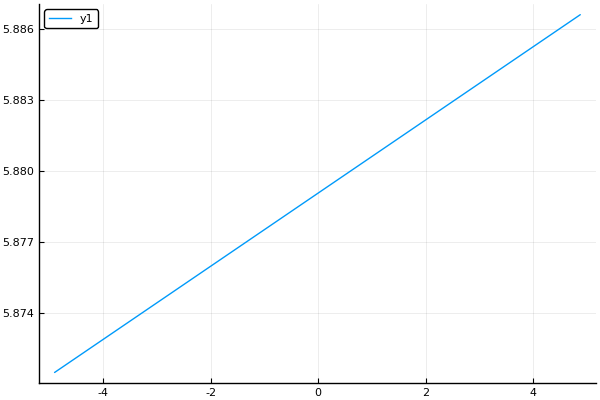

In [195]:
my_equation2(x) = coeficientes_df2[2]*(x) + coeficientes_df2[1]
Plots.plot(my_equation2)

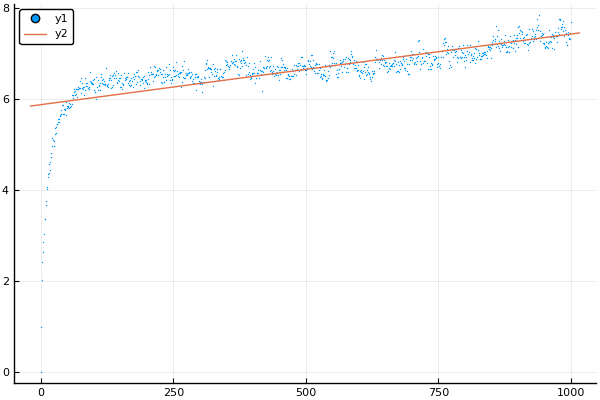

In [196]:
Plots.scatter(x,y, markersize=1, markerstrokewidth=0)
Plots.plot!(my_equation2)

In [ ]:


aerolinea_matriz = string("global", "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/global/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, "global")
for t in 1:1000
 spls=LightGraphs.dijkstra_shortest_paths(red_multiplex, kk[1,201])
    dist_media = spls.dists[282]
                
                L = (dist_media)^2

In [16]:
Ds = []

for k = 2 #:length(lista_aerolineas)
       @show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i = 2 #:size(rwn)[1] #num. de iteraciones/renglones
        @show i
        #Ahora los tiempos
        u = findfirst(x -> x == 0, rwn[i,:])
        if u == nothing
            final = 1001
        elseif u != nothing
            final = u-1
        end
        @show final
        for j in 1:100:final
            @show j
            
            indice_aerop = rwn[i,j]
            @show indice_aerop
            spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
            #@show spls
            dist_media = spls.dists[indice_wuh[]]
           @show dist_media
            L = (dist_media)^2
            
            D = L / 2*j 
            @show D
            push!(Ds, D)
            
        end
    end
    #Ds = []
    
    #archivo_coef_dif = string(airline_code, "_coef_difusion.csv") #nombre coef difusion
    #writedlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_coef_dif", D, ',')

end
return Ds

k = 2
airline_code = "global"
i = 2
final = 50
j = 1
indice_aerop = 282
dist_media = 0
D = 0.0


1-element Array{Any,1}:
 0.0

In [119]:
function coef_difusion_aerol(airline_code::Int64)

coefs_dif = []
Ds = []

for k = airline_code #:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    #@show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i in 1:1000 #size(rwn)[1] #num. de iteraciones/renglones
        #@show i
        #Ahora los tiempos
            
        u = findfirst(x -> x == 0, rwn[i,:])
        if u == nothing
            final = 1001
        elseif u != nothing
            final = u-1
        end
            
        
            
        for j in 1:100:final
           #@show j
            
            indice_aerop = rwn[i,j]
            #@show indice_aerop
            spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
            #@show spls
            dist_media = spls.dists[indice_wuh[]]
            #@show dist_media
            L = (dist_media)^2
            
            D = L / 2*j 
            #@show D
            push!(Ds, D)
            
        end
            
        push!(coefs_dif, Ds) 
        Ds = []
    end
        
    
    
end
return coefs_dif
    
end

coef_difusion_aerol (generic function with 1 method)

In [120]:
uuj=coef_difusion_aerol(27)

1000-element Array{Any,1}:
 Any[0.0, 202.0, 0.0, 150.5, 200.5, 250.5, 1202.0, 1402.0, 400.5, 1802.0, 2002.0]    
 Any[0.0, 202.0, 100.5, 0.0, 200.5, 1002.0, 1202.0, 350.5, 1602.0, 450.5, 500.5]     
 Any[0.0, 454.5, 100.5, 602.0, 1804.5, 1002.0, 300.5, 1402.0, 1602.0, 450.5, 2002.0] 
 Any[0.0, 202.0, 402.0, 0.0, 802.0, 250.5, 300.5, 1402.0, 400.5, 450.5, 2002.0]      
 Any[0.0, 202.0, 402.0, 602.0, 200.5, 1002.0, 0.0, 350.5, 1602.0, 450.5, 500.5]      
 Any[0.0, 50.5, 100.5, 1354.5, 200.5, 1002.0, 300.5, 350.5, 1602.0, 1802.0, 500.5]   
 Any[0.0, 202.0, 100.5, 150.5, 0.0, 0.0, 1202.0, 350.5, 1602.0, 1802.0, 500.5]       
 Any[0.0, 202.0, 904.5, 602.0, 802.0, 1002.0, 300.5, 1402.0, 3604.5, 450.5, 500.5]   
 Any[0.0, 454.5, 402.0, 150.5, 200.5, 1002.0, 300.5, 3154.5, 400.5, 450.5, 2002.0]   
 Any[0.0, 202.0, 100.5, 602.0, 200.5, 1002.0, 1202.0, 1402.0, 1602.0, 1802.0, 500.5] 
 Any[0.0, 202.0, 904.5, 150.5, 200.5, 1002.0, 1202.0, 1402.0, 1602.0, 1802.0, 2002.0]
 Any[0.0, 50.5, 100.5, 1354

In [65]:
Ds = []

for k = 27 #:length(lista_aerolineas)
       @show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i = 2 #:size(rwn)[1] #num. de iteraciones/renglones
        @show i
        #Ahora los tiempos
        u = findfirst(x -> x == 0, rwn[i,:])
        if u == nothing
            final = 1001
        elseif u != nothing
            final = u-1
        end
        @show final
        for j in 1:100:final
            @show j
            
            indice_aerop = rwn[i,j]
            @show indice_aerop
            spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
            #@show spls
            dist_media = spls.dists[indice_wuh[]]
           @show dist_media
            L = (dist_media)^2
            
            D = L / 2*j 
            @show D
            push!(Ds, D)
            
        end
    end
    #Ds = []
    
    #archivo_coef_dif = string(airline_code, "_coef_difusion.csv") #nombre coef difusion
    #writedlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_coef_dif", D, ',')

end
return Ds

k = 27
airline_code = "EU"
i = 2
final = 1001
j = 1
indice_aerop = 29
dist_media = 0
D = 0.0
j = 101
indice_aerop = 15
dist_media = 2
D = 202.0
j = 201
indice_aerop = 6
dist_media = 1
D = 100.5
j = 301
indice_aerop = 29
dist_media = 0
D = 0.0
j = 401
indice_aerop = 6
dist_media = 1
D = 200.5
j = 501
indice_aerop = 14
dist_media = 2
D = 1002.0
j = 601
indice_aerop = 30
dist_media = 2
D = 1202.0
j = 701
indice_aerop = 6
dist_media = 1
D = 350.5
j = 801
indice_aerop = 5
dist_media = 2
D = 1602.0
j = 901
indice_aerop = 6
dist_media = 1
D = 450.5
j = 1001
indice_aerop = 6
dist_media = 1
D = 500.5


11-element Array{Any,1}:
    0.0
  202.0
  100.5
    0.0
  200.5
 1002.0
 1202.0
  350.5
 1602.0
  450.5
  500.5

In [18]:
Ds = []

for k = 27 #:length(lista_aerolineas)
       @show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i = 1 #:size(rwn)[1] #num. de iteraciones/renglones
        @show i
        #Ahora los tiempos
        u = findfirst(x -> x == 0, rwn[i,:])
        if u == nothing
            final = 1001
        elseif u != nothing
            final = u-1
        end
        @show final
        for j in 1:100:final
            @show j
            
            indice_aerop = rwn[i,j]
            @show indice_aerop
            spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
            #@show spls
            dist_media = spls.dists[indice_wuh[]]
           @show dist_media
            L = (dist_media)^2
            
            D = L / 2*j 
            @show D
            push!(Ds, D)
            
        end
    end
    #Ds = []
    
    #archivo_coef_dif = string(airline_code, "_coef_difusion.csv") #nombre coef difusion
    #writedlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_coef_dif", D, ',')

end
return Ds

k = 27
airline_code = "EU"
i = 1
final = 1001
j = 1
indice_aerop = 29
dist_media = 0
D = 0.0
j = 101
indice_aerop = 8
dist_media = 2
D = 202.0
j = 201
indice_aerop = 29
dist_media = 0
D = 0.0
j = 301
indice_aerop = 6
dist_media = 1
D = 150.5
j = 401
indice_aerop = 6
dist_media = 1
D = 200.5
j = 501
indice_aerop = 6
dist_media = 1
D = 250.5
j = 601
indice_aerop = 18
dist_media = 2
D = 1202.0
j = 701
indice_aerop = 5
dist_media = 2
D = 1402.0
j = 801
indice_aerop = 6
dist_media = 1
D = 400.5
j = 901
indice_aerop = 15
dist_media = 2
D = 1802.0
j = 1001
indice_aerop = 15
dist_media = 2
D = 2002.0


11-element Array{Any,1}:
    0.0
  202.0
    0.0
  150.5
  200.5
  250.5
 1202.0
 1402.0
  400.5
 1802.0
 2002.0

In [171]:
nn = readdlm("/Users/yuriko/Downloads/codejulia/datart/EU/caminatas/nombres/EU_WUH_walk_names.csv", ',', String)
       

1000×1001 Array{String,2}:
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"  …  "KWE"  "FOC"  "KWE"  "FOC"  "KWE"
 "WUH"  "CTU"  "SZX"  "CTU"  "JNG"     "XMN"  "JGS"  "XMN"  "JGS"  "CTU"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"     "HGH"  "CSX"  "HGH"  "CTU"  "JHG"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"     "KWE"  "FOC"  "KWE"  "FOC"  "KWE"
 "WUH"  "CTU"  "SYX"  "HGH"  "CSX"     "JHG"  "KMG"  "JHG"  "KMG"  "CTU"
 "WUH"  "CTU"  "LYG"  "CTU"  "XIY"  …  "CTU"  "SYX"  "CSX"  "SYX"  "CTU"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"     "KMG"  "LZH"  "XMN"  "JGS"  "CTU"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"     "CTU"  "JGS"  "CTU"  "TNA"  "CTU"
 "WUH"  "CTU"  "LJG"  "CTU"  "KMG"     "KWE"  "FOC"  "KWE"  "FOC"  "KWE"
 "WUH"  "CTU"  "NKG"  "CSX"  "SYX"     "XMN"  "JGS"  "XMN"  "JGS"  "CTU"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"  …  "XIY"  "CTU"  "LYG"  "CTU"  "NKG"
 "WUH"  "HYN"  "WUH"  "HYN"  "WUH"     "CTU"  "JGS"  "CTU"  "PVG"  "CTU"
 "WUH"  "CTU"  "JHG"  "CTU"  "JHG"     "CSX"  "HGH"  "CTU"  "WNZ"  "CTU"
 ⋮                      

In [153]:
nn[1,101]

"BRU"

In [109]:
findfirst(x -> x == " ", nn[2,:])

51

In [111]:
nn[2,50]

"KPR"

In [119]:
bh=1:100:236
bh[4]

BoundsError: BoundsError: attempt to access 3-element StepRange{Int64,Int64} at index [4]

## Histogramas caminatas infectadas

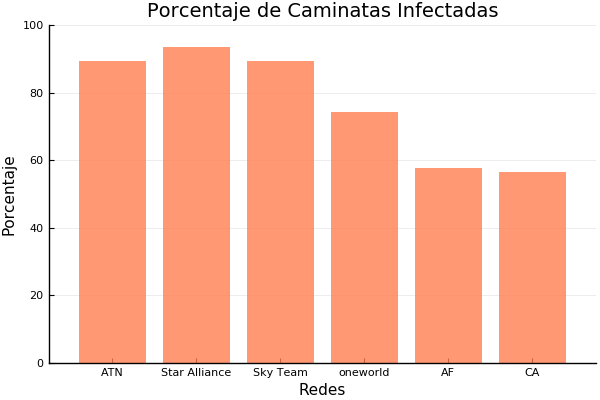

In [7]:
#Airlines porcentaje_WUH_inf_MX
aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]

graph = bar(aerolineas_inf, porcentaje_inf, 
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    linealpha = 0,
    title = "Porcentaje de Caminatas Infectadas",
    xlabel = "Redes",
    ylabel = "Porcentaje",
    legend = :none,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites

## Cobertura de cada red

In [8]:
#LEO TODAS LAS COBERTURAS DEL VÉRTICE/AEROPUERTO WUH

coberturas_wuh = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    archivo_cobertura_vertex = string(airline_code, "_vertex_coverage.csv")
   
    cobertura = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/cobertura/$archivo_cobertura_vertex", ',', Float64)
    
    push!(coberturas_wuh, cobertura[])
    
end

return coberturas_wuh

29-element Array{Any,1}:
 418.34 
 295.176
 243.242
 133.974
 148.012
 116.66 
 103.28 
 139.194
  99.903
  62.247
  93.714
  86.36 
  82.606
   ⋮    
  58.409
  52.773
  48.333
  46.997
  44.809
  44.999
  37.0  
  34.517
  31.98 
  28.982
  21.999
  15.0  

In [9]:
coberturas_wuh = convert(Array{Float64,1}, coberturas_wuh);

In [10]:
porcentaje_cobert = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/Articulo/Random_walks/Tabla_riesgo-mex/Porcentaje_coberturas.csv", '\t', Any)

30×3 Array{Any,2}:
    "Cobertura prom"  "Airlines"         "%Cobertura"
 418.34               "global"         13.6178       
 295.176              "Star Alliance"   9.60859      
 243.242              "Sky Team"        7.91803      
 133.974              "oneworld"        4.36113      
 148.012              "MU"              4.8181       
 116.66               "CZ"              3.79753      
 103.28               "AF"              3.36198      
 139.194              "CA"              4.53105      
  99.903              "KE"              3.25205      
  62.247              "HU"              2.02627      
  93.714              "CX"              3.05059      
  86.36               "GS"              2.8112       
   ⋮                                                 
  58.409              "SC"              1.90133      
  52.773              "HO"              1.71787      
  48.333              "JD"              1.57334      
  46.997              "KA"              1.52985      
  44.809 

In [11]:
porc = porcentaje_cobert[:,3][2:end];
porc = convert(Array{Float64,1}, porc);

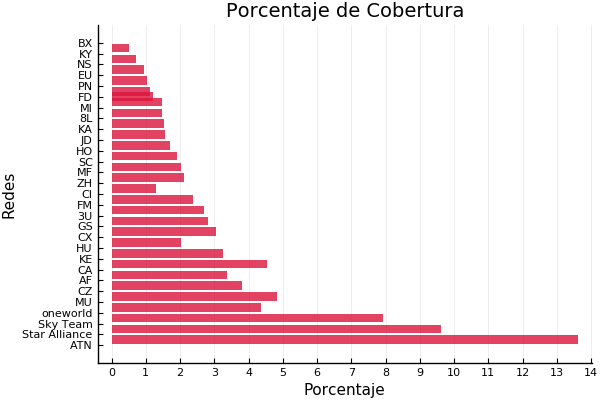

In [20]:
# COBERTURA DE CADA RED

aerolinea_red = ["ATN", "Star Alliance", "Sky Team", "oneworld", "MU", "CZ", "AF", "CA", "KE", 
    "HU", "CX", "GS", "3U", "FM", "CI", "ZH", "MF", "SC", "HO", "JD", "KA", "8L", "MI", "FD", 
    "FD", "PN", "EU", "NS", "KY", "BX"] #lista_aerolineas[2:end]
#@show aerolinea_red
cobertura_red = porc #coberturas_wuh
#@show cobertura_red

graph = bar(aerolinea_red, cobertura_red,   
    bar_width = 0.8,
    orientation = :horizontal,
    fillcolor = :crimson, 
    alpha = 0.8,
    grid = :x,
    #markersize = 3, 
    linealpha = 0,
    title = "Porcentaje de Cobertura",
    xlabel = "Porcentaje",
    ylabel = "Redes",
    xticks = 0:1:15,
    yticks = :all,
    tickfonthalign = :hcenter,
    tickfontvalign = :vcenter,
    #tick_direction = :out,
    legend = :none,
    xrotation = 0)
    #xlims = (-10,250), #obtener límites
    #ylims = (0,100)) #obtener límites

## Histograma por tiempos 
## ATN

In [13]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 2 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  85
 167
 260
 350
 442
 531
 617
 714
 806
 894

In [14]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  8.5
 16.7
 26.0
 35.0
 44.2
 53.1
 61.7
 71.4
 80.6
 89.4

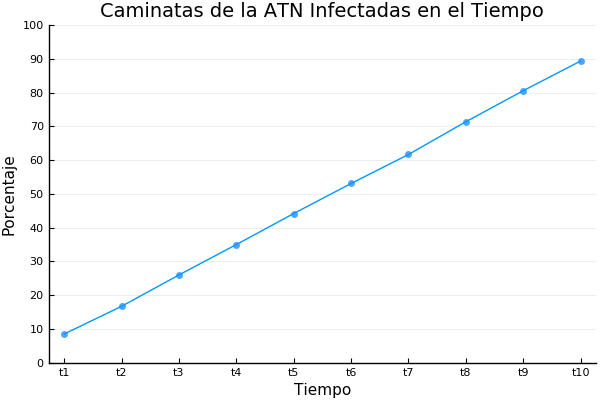

In [15]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"]

graph = plot(xx, porcent_cant_inf)
scatter!(xx, porcent_cant_inf, 
    #line=(:dot, 4),
    markersize = 5,
    markercolor = :dodgerblue,
    markerstrokealpha = 0,
    markerstrokewidth = 0,
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    #linealpha = 0,
    title = "Caminatas de la ATN Infectadas en el Tiempo",
    xlabel = "Tiempo",
    ylabel = "Porcentaje",
    legend = :none,
    yticks = 0:10:100,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites


## Histograma por tiempos 
## Star Alliance

In [16]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 3 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  91
 185
 281
 378
 475
 567
 658
 751
 841
 936

In [17]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  9.1
 18.5
 28.1
 37.8
 47.5
 56.7
 65.8
 75.1
 84.1
 93.6

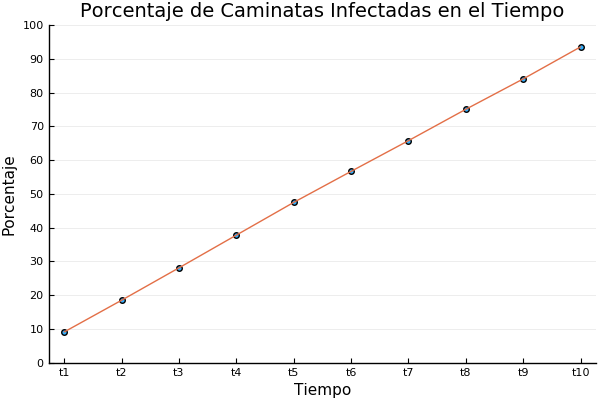

In [18]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
x = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"]

graph = scatter(x, porcent_cant_inf, 
    #line=(:dot, 4),
    #markersize = 4,
    #markerstrokestyle = :dot,
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    #linealpha = 0,
    title = "Porcentaje de Caminatas Infectadas en el Tiempo",
    xlabel = "Tiempo",
    ylabel = "Porcentaje",
    legend = :none,
    yticks = 0:10:100,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites
plot!(x, porcent_cant_inf)


In [ ]:
function 
    
    cantidad_infectados_t = []

for k = 3 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

In [215]:
N = 1000
Ls = []
coefs_dif = []
DMS = []

for k = 2 #:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i in 1:2#1001 
        #@show i
        
        
            
            
        for j in 1:size(rwn)[1] #num. de iteraciones/renglones
            #@show j
            
            
            u = findfirst(x -> x == 0, rwn[j,:])
            if u == nothing
                
                indice_aerop = rwn[j, i]
                
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                
                dist_media = spls.dists[indice_wuh[]]
                
                L = (dist_media)^2
                
            elseif u != nothing
                L = 0
                N -= 1
            end
            
            
          
            
            push!(Ls, L) #para un mismo tiempo
            
        end
        
        dms = (sum(Ls))/N
        push!(DMS, dms)
        
        
        D = dms/(2*i)
        push!(coefs_dif, D)
        
        Ls = []
        
    end
    
end
coefs_dif = convert(Array{Float64, 1}, coefs_dif)
DMS = convert(Array{Float64, 1}, DMS)
return DMS, coefs_dif

airline_code = "global"


([0.0, 2.03374], [0.0, 0.508436])

In [210]:
DMS == DMS2

false

In [217]:
N = 1000
Ls = []
coefs_dif2 = []
DMS2 = []

for k = 2 #:length(lista_aerolineas)
       #@show k
    
    airline_code = lista_aerolineas[k] 
    @show airline_code
    aerolinea_carpeta = airline_code
    
    archivo_caminata_original = string(airline_code, "_WUH_random_walk.csv")
    rwn = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/originales/$archivo_caminata_original", ',', Int64)
    
    aerolinea_matriz = string(airline_code, "_import_matrix.csv") 
    multiplex = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$aerolinea_matriz", ',', Int64)
    
    red_multiplex = my_graph(multiplex, airline_code)
    
    index_wuh = string(airline_code, "_WUH_index.csv") 
    indice_wuh = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/matriz/$index_wuh", ',', Int64)
    
    
    
    for i in 1:2#1001 #tiempo
        @show i
        
        col = rwn[:,i]
            @show col
            
        for j in 1:1000 #num. de iteraciones/renglones
                @show j
                indice_aerop = col[j]
                
            if indice_aerop != 0
                spls = LightGraphs.dijkstra_shortest_paths(red_multiplex, indice_aerop)
                
                dist_media = spls.dists[indice_wuh[]]
                
                L = (dist_media)^2
                
            elseif indice_aerop == 0
                L = 0
                N -= 1
            end
            
            push!(Ls, L) #para un mismo tiempo
            
        end
        
        dms2 = (sum(Ls))/N
        push!(DMS2, dms2)
        
        
        D2 = dms2/(2*i)
        push!(coefs_dif2, D2)
        
        Ls = []
        
    end
    
end
coefs_dif2 = convert(Array{Float64, 1}, coefs_dif2)
DMS2 = convert(Array{Float64, 1}, DMS2)
return DMS2, coefs_dif2

airline_code = "global"
i = 1
col = [282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282

j = 441
j = 442
j = 443
j = 444
j = 445
j = 446
j = 447
j = 448
j = 449
j = 450
j = 451
j = 452
j = 453
j = 454
j = 455
j = 456
j = 457
j = 458
j = 459
j = 460
j = 461
j = 462
j = 463
j = 464
j = 465
j = 466
j = 467
j = 468
j = 469
j = 470
j = 471
j = 472
j = 473
j = 474
j = 475
j = 476
j = 477
j = 478
j = 479
j = 480
j = 481
j = 482
j = 483
j = 484
j = 485
j = 486
j = 487
j = 488
j = 489
j = 490
j = 491
j = 492
j = 493
j = 494
j = 495
j = 496
j = 497
j = 498
j = 499
j = 500
j = 501
j = 502
j = 503
j = 504
j = 505
j = 506
j = 507
j = 508
j = 509
j = 510
j = 511
j = 512
j = 513
j = 514
j = 515
j = 516
j = 517
j = 518
j = 519
j = 520
j = 521
j = 522
j = 523
j = 524
j = 525
j = 526
j = 527
j = 528
j = 529
j = 530
j = 531
j = 532
j = 533
j = 534
j = 535
j = 536
j = 537
j = 538
j = 539
j = 540
j = 541
j = 542
j = 543
j = 544
j = 545
j = 546
j = 547
j = 548
j = 549
j = 550
j = 551
j = 552
j = 553
j = 554
j = 555
j = 556
j = 557
j = 558
j = 559
j = 560
j = 561
j = 562
j = 563
j = 564
j = 565


j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
j = 97
j = 98
j = 99
j = 100
j = 101
j = 102
j = 103
j = 104
j = 105
j = 106
j = 107
j = 108
j = 109
j = 110
j = 111
j = 112
j = 113
j = 114
j = 115
j = 116
j = 117
j = 118
j = 119
j = 120
j = 121
j = 122
j = 123
j = 124
j = 125
j = 126
j = 127
j = 128
j = 129
j = 130
j = 131
j = 132
j = 133
j = 134
j = 135
j = 136
j = 137
j = 138
j = 139
j = 140
j = 141
j = 

([0.0, 1.0], [0.0, 0.25])